# Import the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('/Users/ahnafmasud/CS430 Ahnaf/EVDataExplorer2025.csv')
df

,region_country,category,parameter,mode,powertrain,year,unit,value,Aggregate group
0,World,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,1.700000e+08,_World
1,World,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,1.500000e+08,_World
2,China,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,9.100000e+07,Other
3,China,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,8.200000e+07,Other
4,World,Projection-STEPS,EV stock,Cars,PHEV,2030,Vehicles,8.200000e+07,_World
...,...,...,...,...,...,...,...,...,...
16431,Rest of the world,Historical,Oil displacement Mbd,Trucks,EV,2017,Million barrels per day,2.400000e-06,Other
16432,Rest of the world,Historical,Oil displacement Mbd,2 and 3 wheelers,EV,2011,Million barrels per day,2.200000e-06,Other
16433,Rest of the world,Historical,Oil displacement Mbd,2 and 3 wheelers,EV,2010,Million barrels per day,1.700000e-06,Other
16434,USA,Historical,Oil displacement Mbd,2 and 3 wheelers,EV,2012,Million barrels per day,1.300000e-06,Other


# Data Cleaning

In [2]:
df.head()

,region_country,category,parameter,mode,powertrain,year,unit,value,Aggregate group
0,World,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,170000000.0,_World
1,World,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,150000000.0,_World
2,China,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,91000000.0,Other
3,China,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,82000000.0,Other
4,World,Projection-STEPS,EV stock,Cars,PHEV,2030,Vehicles,82000000.0,_World


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_country   16436 non-null  object 
 1   category         16436 non-null  object 
 2   parameter        16436 non-null  object 
 3   mode             16436 non-null  object 
 4   powertrain       16436 non-null  object 
 5   year             16436 non-null  int64  
 6   unit             16436 non-null  object 
 7   value            16436 non-null  float64
 8   Aggregate group  16436 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [4]:
df.describe()

,year,value
count,16436.000000,1.643600e+04
mean,2018.852336,2.678267e+05
std,4.271488,3.325613e+06
min,2010.000000,1.200000e-06
25%,2016.000000,1.000000e+00
50%,2019.000000,4.900000e+01
75%,2022.000000,2.500000e+03
max,2030.000000,1.700000e+08


In [5]:
df.nunique()

region_country       63
category              2
parameter             9
mode                  6
powertrain            6
year                 16
unit                  6
value              1060
Aggregate group       4
dtype: int64

In [6]:
df["region_country"].unique()

array(['World', 'China', 'Asia Pacific', 'India', 'Europe',
       'Rest of the world', 'USA', 'EU27', 'North America', 'Germany',
       'Viet Nam', 'United Kingdom', 'France', 'Norway', 'Canada',
       'Netherlands', 'Central and South America', 'Korea', 'Indonesia',
       'Sweden', 'Belgium', 'Denmark', 'Japan', 'Italy', 'Australia',
       'Turkiye', 'Spain', 'Switzerland', 'Austria', 'Israel', 'Thailand',
       'Finland', 'Portugal', 'Brazil', 'New Zealand',
       'Middle East and Caspian', 'Poland', 'Mexico', 'Malaysia',
       'Russia', 'Iceland', 'Greece', 'Uzbekistan', 'Africa', 'Ireland',
       'Chile', 'Costa Rica', 'Colombia', 'Romania', 'Luxembourg',
       'Czech Republic', 'Hungary', 'Slovenia', 'South Africa',
       'Slovakia', 'Lithuania', 'Bulgaria', 'Croatia', 'Latvia',
       'Estonia', 'Cyprus', 'Jordan', 'Seychelles'], dtype=object)

In [7]:
df.isnull().sum()

region_country     0
category           0
parameter          0
mode               0
powertrain         0
year               0
unit               0
value              0
Aggregate group    0
dtype: int64

In [8]:
df = df[df["category"] != "Projection-STEPS"]

In [9]:
df = df[df["year"] <= 2024]

In [10]:
df = df.drop_duplicates()

In [11]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [12]:
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df["year"] = df["year"].astype(int)

In [13]:
# Final shape + quick look
print("Final shape:", df.shape)
df.head()

Final shape: (14616, 9)


,region_country,category,parameter,mode,powertrain,year,unit,value,aggregate_group
5,World,Historical,EV stock,2 and 3 wheelers,BEV,2024,Vehicles,79000000.0,_World
7,Asia Pacific,Historical,EV stock,2 and 3 wheelers,BEV,2024,Vehicles,77000000.0,Aggregate_sales_stock
8,World,Historical,EV stock,2 and 3 wheelers,BEV,2023,Vehicles,69000000.0,_World
10,Asia Pacific,Historical,EV stock,2 and 3 wheelers,BEV,2023,Vehicles,68000000.0,Aggregate_sales_stock
11,China,Historical,EV stock,2 and 3 wheelers,BEV,2024,Vehicles,67000000.0,Other


# EDA

In [14]:
# Check unique values in key columns
print("Parameters:", df["parameter"].unique())
print("\nPowertrains:", df["powertrain"].unique())
print("\nModes:", df["mode"].unique())
print("\nCountries/Regions sample:", df["region_country"].unique()[:20])
print("\nYears range:", df["year"].min(), "-", df["year"].max())

Parameters: ['EV stock' 'EV sales' 'EV charging points'
 'Oil displacement, million lge' 'Battery demand' 'EV sales share'
 'EV stock share' 'Oil displacement Mbd']

Powertrains: ['BEV' 'PHEV' 'Publicly available slow' 'Publicly available fast' 'FCEV'
 'EV']

Modes: ['2 and 3 wheelers' 'Cars' 'EV' 'Vans' 'Buses' 'Trucks']

Countries/Regions sample: ['World' 'Asia Pacific' 'China' 'Europe' 'India' 'EU27' 'North America'
 'USA' 'Rest of the world' 'Germany' 'Viet Nam' 'United Kingdom' 'France'
 'Norway' 'Canada' 'Netherlands' 'Central and South America' 'Korea'
 'Indonesia' 'Sweden']

Years range: 2010 - 2024


In [15]:
# Filter only EV stock
df_stock = df[df["parameter"] == "EV stock"]

# Filter only global (World) values
df_global_stock = df_stock[df_stock["region_country"] == "World"]

# Group by year to get the global trend
global_stock_over_time = (
    df_global_stock.groupby("year")["value"].sum().reset_index()
)

global_stock_over_time

,year,value
0,2010,87348.0
1,2011,186252.0
2,2012,2225623.0
3,2013,4539265.0
4,2014,7491796.0
5,2015,10859732.0
6,2016,15410758.0
7,2017,20761700.0
8,2018,27999450.0
9,2019,38293971.0


In [16]:
# Filter only EV sales
df_sales = df[df["parameter"] == "EV sales"]

# Filter for global totals (World)
df_global_sales = df_sales[df_sales["region_country"] == "World"]

# Group by year
global_sales_over_time = (
    df_global_sales.groupby("year")["value"].sum().reset_index()
)

global_sales_over_time

,year,value
0,2010,50702.0
1,2011,84050.0
2,2012,2131150.0
3,2013,2516118.0
4,2014,3151566.0
5,2015,3423671.0
6,2016,4037635.0
7,2017,5049350.0
8,2018,7458400.0
9,2019,8947332.0


In [17]:
# Select major regions to compare
regions_of_interest = ["China", "United States", "European Union"]

# Filter EV stock rows
df_stock = df[df["parameter"] == "EV stock"]

# Filter for the selected regions
df_regions_stock = df_stock[df_stock["region_country"].isin(regions_of_interest)]

# Group by region and year
region_stock_over_time = (
    df_regions_stock.groupby(["region_country", "year"])["value"].sum().reset_index()
)

region_stock_over_time

,region_country,year,value
0,China,2010,4256.0
1,China,2011,12040.0
2,China,2012,1725240.0
3,China,2013,3745800.0
4,China,2014,6219600.0
5,China,2015,9249017.0
6,China,2016,12966018.0
7,China,2017,16770358.0
8,China,2018,22002617.0
9,China,2019,30276175.0


In [18]:
# Filter only EV stock
df_stock = df[df["parameter"] == "EV stock"]

# Keep only BEV and PHEV
df_bev_phev = df_stock[df_stock["powertrain"].isin(["BEV", "PHEV"])]

# Group globally by powertrain and year
bev_phev_global = (
    df_bev_phev
      .groupby(["powertrain", "year"])["value"]
      .sum()
      .reset_index()
      .sort_values(["powertrain", "year"])
)

bev_phev_global

,powertrain,year,value
0,BEV,2010,268396.0
1,BEV,2011,565367.0
2,BEV,2012,6533825.0
3,BEV,2013,13293227.0
4,BEV,2014,21608159.0
5,BEV,2015,31229846.0
6,BEV,2016,43189811.0
7,BEV,2017,58240822.0
8,BEV,2018,79313854.0
9,BEV,2019,108196713.0


In [19]:
# Select all rows where the parameter contains the word "charging"
charging_df = df[df["parameter"].str.contains("charging", case=False, na=False)]

charging_df.head(10)

,region_country,category,parameter,mode,powertrain,year,unit,value,aggregate_group
207,World,Historical,EV charging points,EV,Publicly available slow,2024,charging points,3400000.0,_World
243,World,Historical,EV charging points,EV,Publicly available slow,2023,charging points,2600000.0,_World
276,World,Historical,EV charging points,EV,Publicly available fast,2024,charging points,2000000.0,_World
290,China,Historical,EV charging points,EV,Publicly available slow,2024,charging points,1900000.0,Other
293,World,Historical,EV charging points,EV,Publicly available slow,2022,charging points,1800000.0,_World
314,China,Historical,EV charging points,EV,Publicly available fast,2024,charging points,1600000.0,Other
331,China,Historical,EV charging points,EV,Publicly available slow,2023,charging points,1500000.0,Other
338,World,Historical,EV charging points,EV,Publicly available fast,2023,charging points,1400000.0,_World
356,China,Historical,EV charging points,EV,Publicly available fast,2023,charging points,1200000.0,Other
357,World,Historical,EV charging points,EV,Publicly available slow,2021,charging points,1200000.0,_World


In [20]:
# Group global charging infrastructure by year
global_charging = (
    charging_df[charging_df["region_country"] == "World"]
      .groupby("year")["value"]
      .sum()
      .reset_index()
      .sort_values("year")
)

global_charging

,year,value
0,2010,4010.0
1,2011,10830.0
2,2012,30600.0
3,2013,44600.0
4,2014,94300.0
5,2015,163000.0
6,2016,258000.0
7,2017,332000.0
8,2018,550000.0
9,2019,880000.0


# Visualizations

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


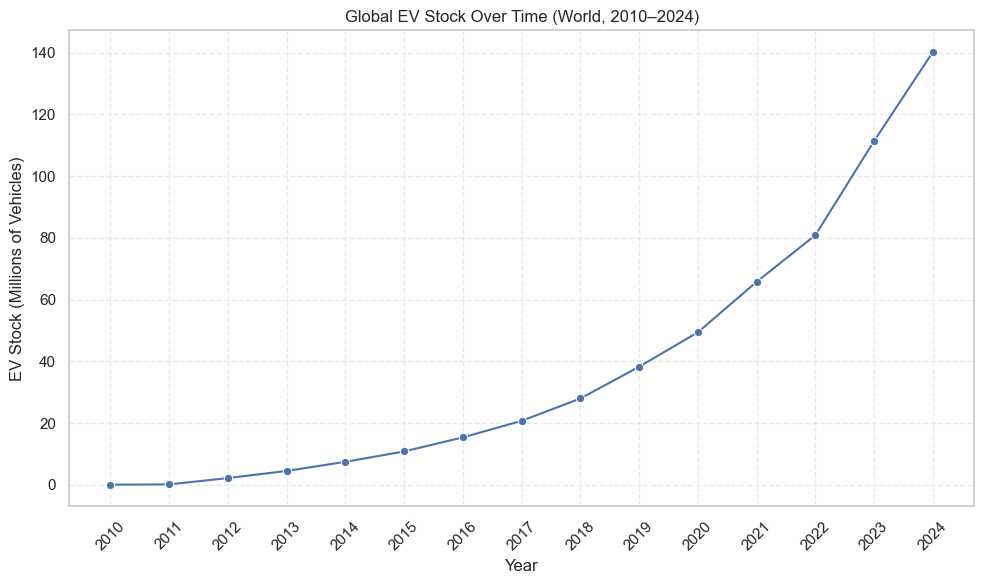

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df_stock_world = df[
    (df["parameter"] == "EV stock") &
    (df["region_country"] == "World") &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

global_stock_over_time = (
    df_stock_world
    .groupby("year")["value"]
    .sum()
    .reset_index()
    .sort_values("year")
)

global_stock_over_time["value_million"] = global_stock_over_time["value"] / 1e6

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=global_stock_over_time,
    x="year",
    y="value_million",
    marker="o"
)

plt.title("Global EV Stock Over Time (World, 2010–2024)")
plt.xlabel("Year")
plt.ylabel("EV Stock (Millions of Vehicles)")
plt.xticks(range(2010, 2025), rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

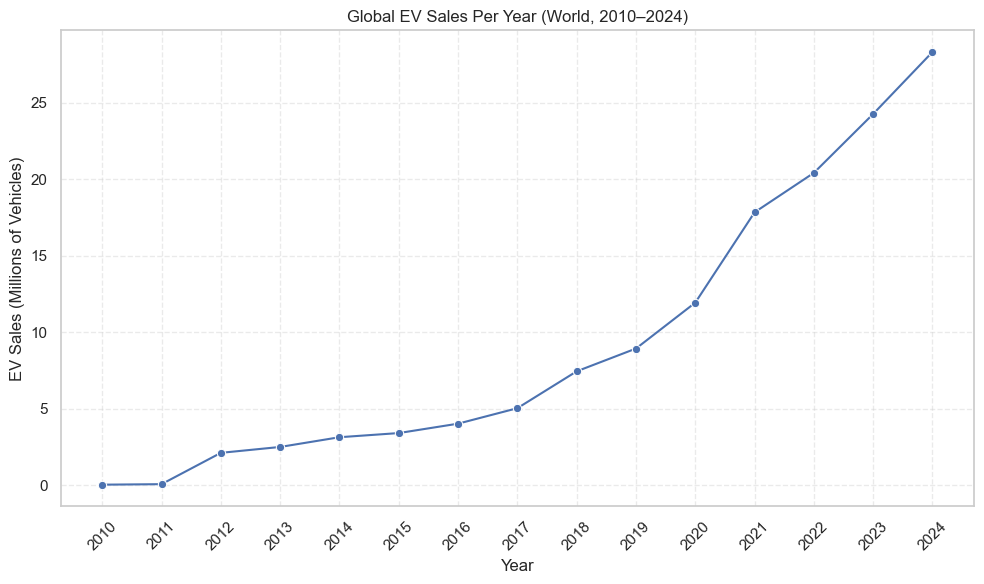

In [23]:
df_sales_world = df[
    (df["parameter"] == "EV sales") &
    (df["region_country"] == "World") &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

global_sales_over_time = (
    df_sales_world
    .groupby("year")["value"]
    .sum()
    .reset_index()
    .sort_values("year")
)

global_sales_over_time["value_million"] = global_sales_over_time["value"] / 1e6

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=global_sales_over_time,
    x="year",
    y="value_million",
    marker="o"
)

plt.title("Global EV Sales Per Year (World, 2010–2024)")
plt.xlabel("Year")
plt.ylabel("EV Sales (Millions of Vehicles)")
plt.xticks(range(2010, 2025), rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

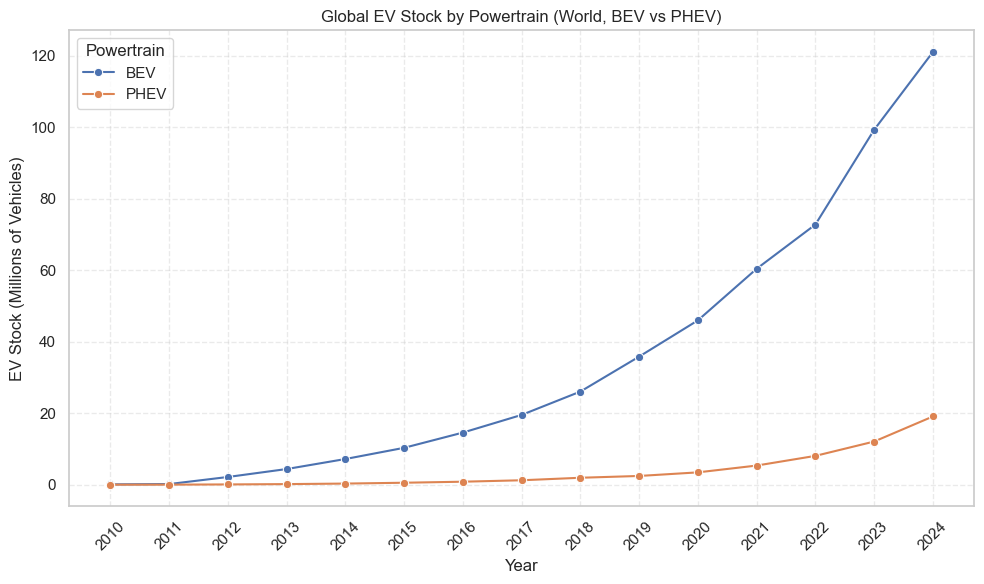

In [24]:
df_stock_world = df[
    (df["parameter"] == "EV stock") &
    (df["region_country"] == "World") &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

df_bev_phev_world = df_stock_world[df_stock_world["powertrain"].isin(["BEV", "PHEV"])].copy()

bev_phev_global = (
    df_bev_phev_world
    .groupby(["year", "powertrain"])["value"]
    .sum()
    .reset_index()
    .sort_values(["powertrain", "year"])
)

bev_phev_global["value_million"] = bev_phev_global["value"] / 1e6

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=bev_phev_global,
    x="year",
    y="value_million",
    hue="powertrain",
    marker="o"
)

plt.title("Global EV Stock by Powertrain (World, BEV vs PHEV)")
plt.xlabel("Year")
plt.ylabel("EV Stock (Millions of Vehicles)")
plt.xticks(range(2010, 2025), rotation=45)
plt.legend(title="Powertrain")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

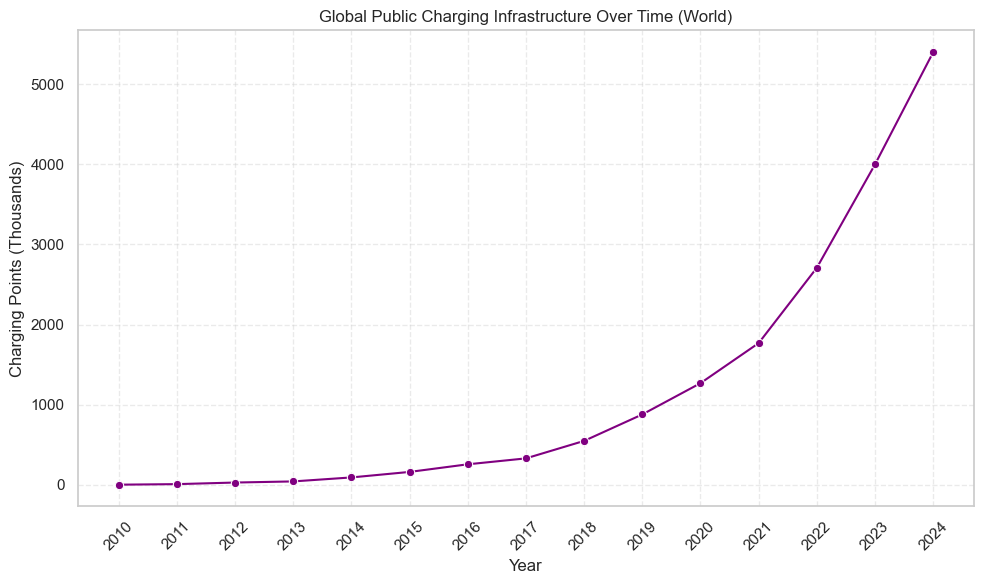

In [25]:
charging_df = df[
    df["parameter"].str.contains("charging", case=False, na=False)
].copy()

charging_world = charging_df[
    (charging_df["region_country"] == "World") &
    (charging_df["category"] != "Projection-STEPS") &
    (charging_df["year"] <= 2024)
].copy()

global_charging = (
    charging_world
    .groupby("year")["value"]
    .sum()
    .reset_index()
    .sort_values("year")
)

global_charging["value_thousand"] = global_charging["value"] / 1e3

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=global_charging,
    x="year",
    y="value_thousand",
    marker="o",
    color="purple"
)

plt.title("Global Public Charging Infrastructure Over Time (World)")
plt.xlabel("Year")
plt.ylabel("Charging Points (Thousands)")
plt.xticks(range(2010, 2025), rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

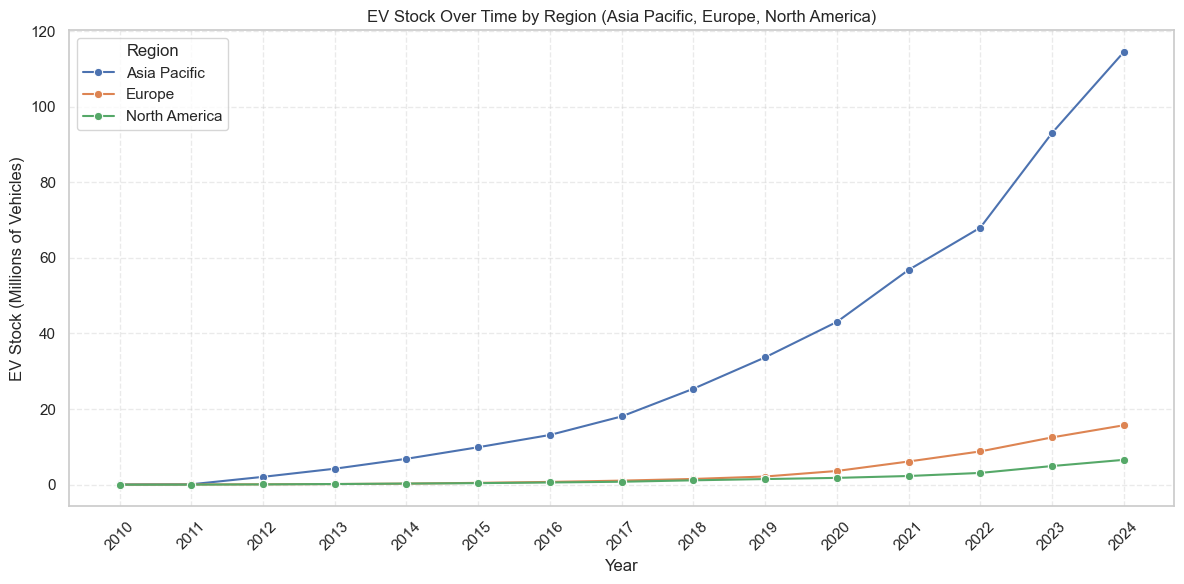

In [26]:
regions_of_interest = ["Asia Pacific", "Europe", "North America"]

df_stock_regions = df[
    (df["parameter"] == "EV stock") &
    (df["region_country"].isin(regions_of_interest)) &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

region_ev_trend = (
    df_stock_regions
    .groupby(["region_country", "year"])["value"]
    .sum()
    .reset_index()
    .sort_values(["region_country", "year"])
)

region_ev_trend["value_million"] = region_ev_trend["value"] / 1e6

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=region_ev_trend,
    x="year",
    y="value_million",
    hue="region_country",
    marker="o"
)

plt.title("EV Stock Over Time by Region (Asia Pacific, Europe, North America)")
plt.xlabel("Year")
plt.ylabel("EV Stock (Millions of Vehicles)")
plt.xticks(range(2010, 2025), rotation=45)
plt.legend(title="Region")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

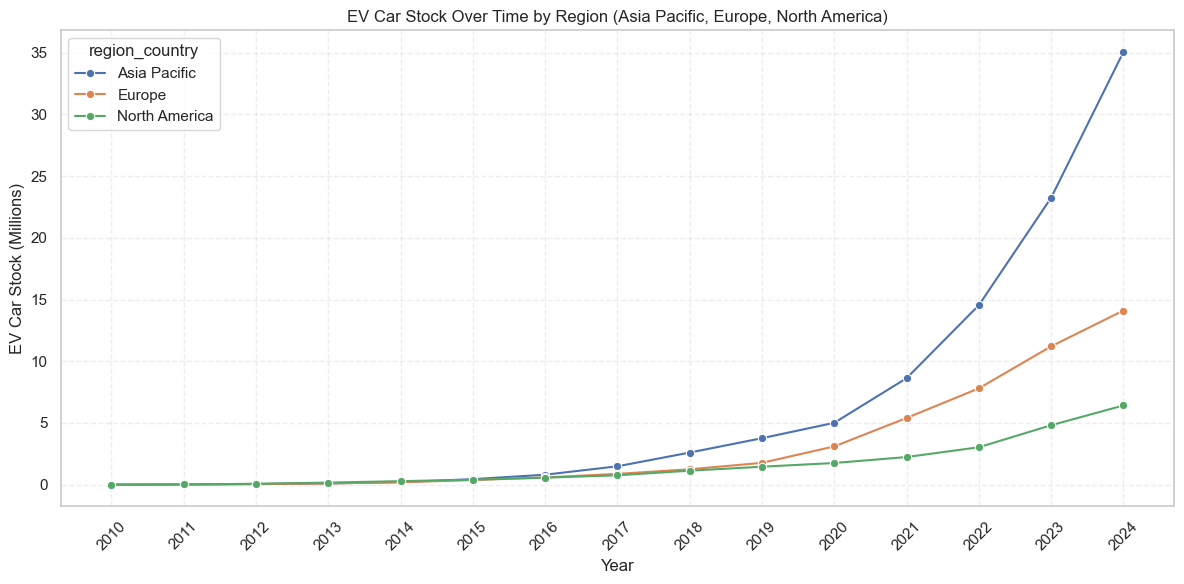

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

regions = ["Asia Pacific", "Europe", "North America"]

df_cars_region_stock = df[
    (df["parameter"] == "EV stock") &
    (df["mode"] == "Cars") &
    (df["region_country"].isin(regions)) &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

cars_region_stock = (
    df_cars_region_stock
    .groupby(["region_country", "year"])["value"]
    .sum()
    .reset_index()
    .sort_values(["region_country", "year"])
)

cars_region_stock["value_million"] = cars_region_stock["value"] / 1e6

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cars_region_stock,
    x="year",
    y="value_million",
    hue="region_country",
    marker="o"
)

plt.title("EV Car Stock Over Time by Region (Asia Pacific, Europe, North America)")
plt.xlabel("Year")
plt.ylabel("EV Car Stock (Millions)")
plt.xticks(range(2010, 2025), rotation=45)
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

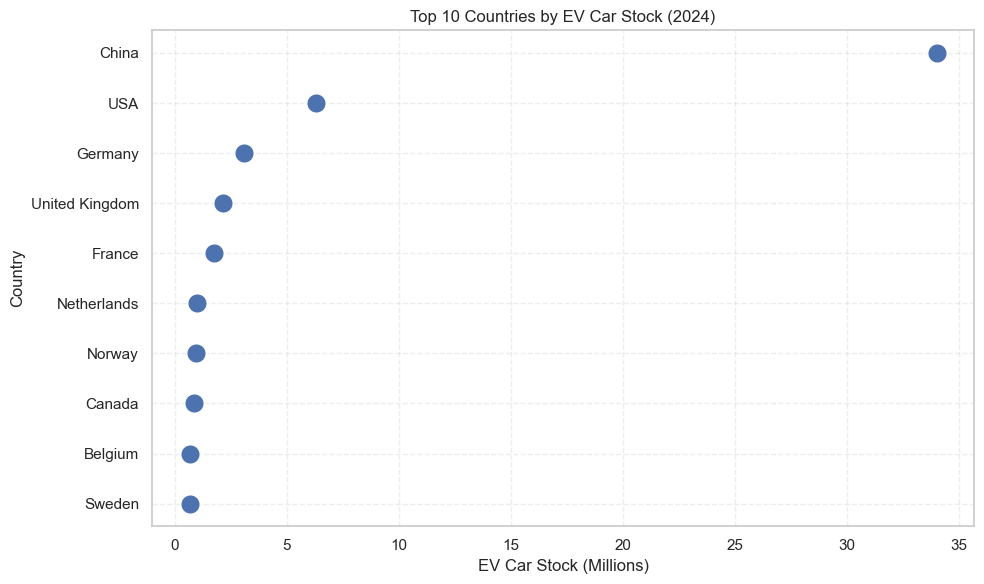

,region_country,value_million
6,China,34.001
35,USA,6.319
12,Germany,3.102
36,United Kingdom,2.170
11,France,1.752
23,Netherlands,0.981
25,Norway,0.960
4,Canada,0.860
2,Belgium,0.670
31,Sweden,0.670


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df_cars = df[
    (df["parameter"] == "EV stock") &
    (df["mode"] == "Cars") &
    (df["category"] != "Projection-STEPS") &
    (df["year"] == 2024)
].copy()

aggregates = [
    "World","Asia Pacific","Europe","North America","EU27",
    "Rest of the world","Central and South America","Middle East and Caspian","Africa"
]
df_cars = df_cars[~df_cars["region_country"].isin(aggregates)]

top10_cars_2024 = (
    df_cars.groupby("region_country")["value"]
    .sum()
    .reset_index()
    .sort_values("value", ascending=False)
    .head(10)
)

top10_cars_2024["value_million"] = top10_cars_2024["value"] / 1e6

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top10_cars_2024,
    x="value_million",
    y="region_country",
    s=200
)

plt.title("Top 10 Countries by EV Car Stock (2024)")
plt.xlabel("EV Car Stock (Millions)")
plt.ylabel("Country")
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

top10_cars_2024[["region_country", "value_million"]].round(3)

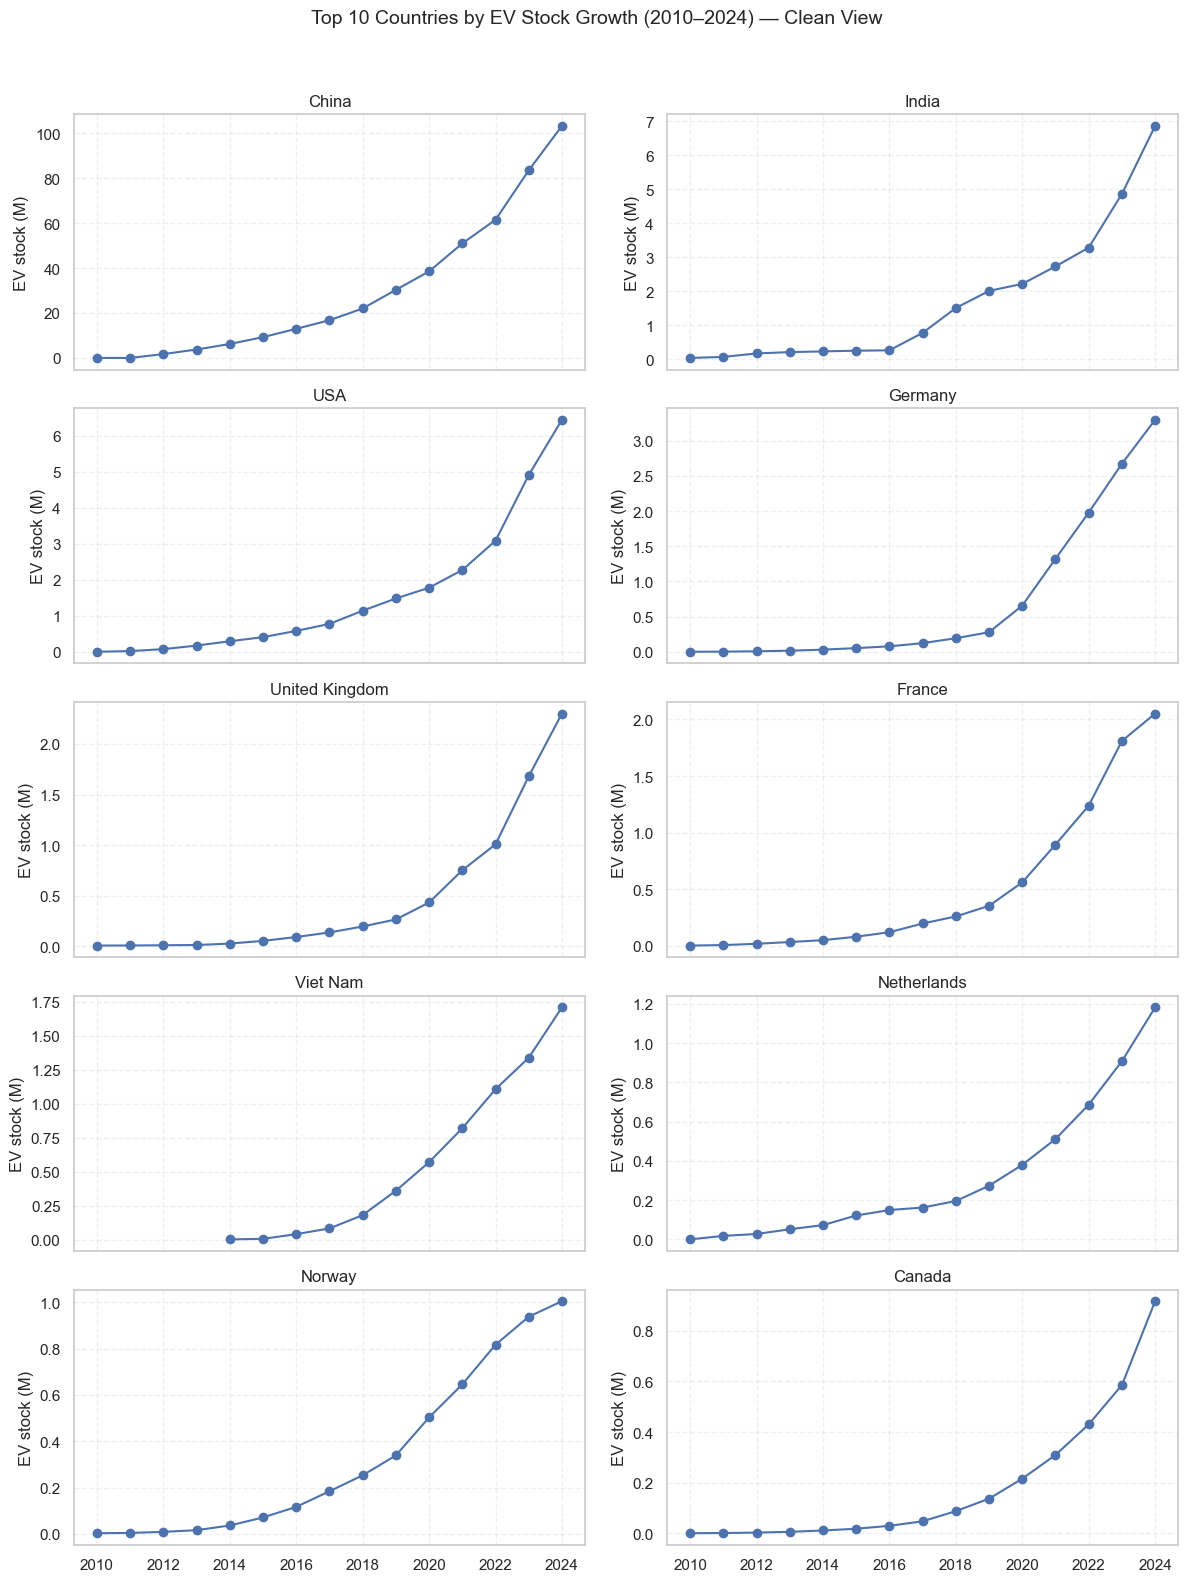

In [29]:
import matplotlib.pyplot as plt

# Historical EV stock only, <= 2024
df_stock_clean = df[
    (df["parameter"] == "EV stock") &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

aggregates = [
    "World","Asia Pacific","Europe","North America","EU27",
    "Rest of the world","Central and South America","Middle East and Caspian","Africa"
]
df_stock_clean = df_stock_clean[~df_stock_clean["region_country"].isin(aggregates)]

country_year = (
    df_stock_clean.groupby(["region_country","year"])["value"]
    .sum()
    .reset_index()
)

# Growth from 2010 to 2024 (missing 2010 treated as 0)
v0 = (country_year[country_year["year"] == 2010]
      .set_index("region_country")["value"].rename("v0"))
v1 = (country_year[country_year["year"] == 2024]
      .set_index("region_country")["value"].rename("v1"))

g = pd.concat([v0, v1], axis=1)
g["v0"] = g["v0"].fillna(0)
g = g.dropna(subset=["v1"])
g["growth"] = g["v1"] - g["v0"]

top10_growth = g.sort_values("growth", ascending=False).head(10).reset_index()
top10_list = top10_growth["region_country"].tolist()

top_trend = country_year[country_year["region_country"].isin(top10_list)].copy()
top_trend["value_million"] = top_trend["value"] / 1e6

# Small multiples
cols = 2
rows = (len(top10_list) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 3.1*rows), sharex=True)
axes = axes.flatten()

for i, c in enumerate(top10_list):
    ax = axes[i]
    d = top_trend[top_trend["region_country"] == c].sort_values("year")
    ax.plot(d["year"], d["value_million"], marker="o")
    ax.set_title(c)
    ax.set_ylabel("EV stock (M)")
    ax.grid(True, linestyle="--", alpha=0.3)

for j in range(i+1, len(axes)):
    axes[j].axis("off")

for ax in axes:
    ax.set_xticks(range(2010, 2025, 2))

plt.suptitle("Top 10 Countries by EV Stock Growth (2010–2024) — Clean View", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# predictive analytics

In [30]:
import pandas as pd
import numpy as np

# Modeling target: Global EV stock (World), historical only
df_model = df[
    (df["parameter"] == "EV stock") &
    (df["region_country"] == "World") &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

global_stock = (
    df_model.groupby("year")["value"]
    .sum()
    .reset_index()
    .sort_values("year")
)

global_stock.head(), global_stock.tail(), (global_stock["year"].min(), global_stock["year"].max())

(   year      value
 0  2010    87348.0
 1  2011   186252.0
 2  2012  2225623.0
 3  2013  4539265.0
 4  2014  7491796.0,
     year        value
 10  2020   49448225.0
 11  2021   65800427.0
 12  2022   80898940.0
 13  2023  111425565.0
 14  2024  140210558.0,
 (2010, 2024))

In [31]:
X = global_stock[["year"]].values
y = global_stock["value"].values

X[:5], y[:5]

(array([[2010],
        [2011],
        [2012],
        [2013],
        [2014]]),
 array([  87348.,  186252., 2225623., 4539265., 7491796.]))

In [32]:
train_mask = global_stock["year"] <= 2020
test_mask = global_stock["year"] >= 2021

X_train = global_stock.loc[train_mask, ["year"]].values
y_train = global_stock.loc[train_mask, "value"].values

X_test = global_stock.loc[test_mask, ["year"]].values
y_test = global_stock.loc[test_mask, "value"].values

X_train.shape, X_test.shape

((11, 1), (4, 1))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

r2_lin, mae_lin, rmse_lin

(-2.5048440309947493, 48220731.545454025, 53619255.54156803)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly2_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

poly2_model.fit(X_train, y_train)
y_pred_poly2 = poly2_model.predict(X_test)

r2_poly2 = r2_score(y_test, y_pred_poly2)
mae_poly2 = mean_absolute_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2))

r2_poly2, mae_poly2, rmse_poly2

(0.17408748408917218, 21804322.69897461, 26028758.59339405)

In [35]:
poly3_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lr", LinearRegression())
])

poly3_model.fit(X_train, y_train)
y_pred_poly3 = poly3_model.predict(X_test)

r2_poly3 = r2_score(y_test, y_pred_poly3)
mae_poly3 = mean_absolute_error(y_test, y_pred_poly3)
rmse_poly3 = np.sqrt(mean_squared_error(y_test, y_pred_poly3))

r2_poly3, mae_poly3, rmse_poly3

(0.8204794268151525, 9436089.234375, 12135105.179690812)

In [36]:
results = pd.DataFrame({
    "Model": ["Linear", "Polynomial (deg=2)", "Polynomial (deg=3)"],
    "R2": [r2_lin, r2_poly2, r2_poly3],
    "MAE": [mae_lin, mae_poly2, mae_poly3],
    "RMSE": [rmse_lin, rmse_poly2, rmse_poly3]
}).round(4)

results

,Model,R2,MAE,RMSE
0,Linear,-2.5048,4.822073e+07,5.361926e+07
1,Polynomial (deg=2),0.1741,2.180432e+07,2.602876e+07
2,Polynomial (deg=3),0.8205,9.436089e+06,1.213511e+07


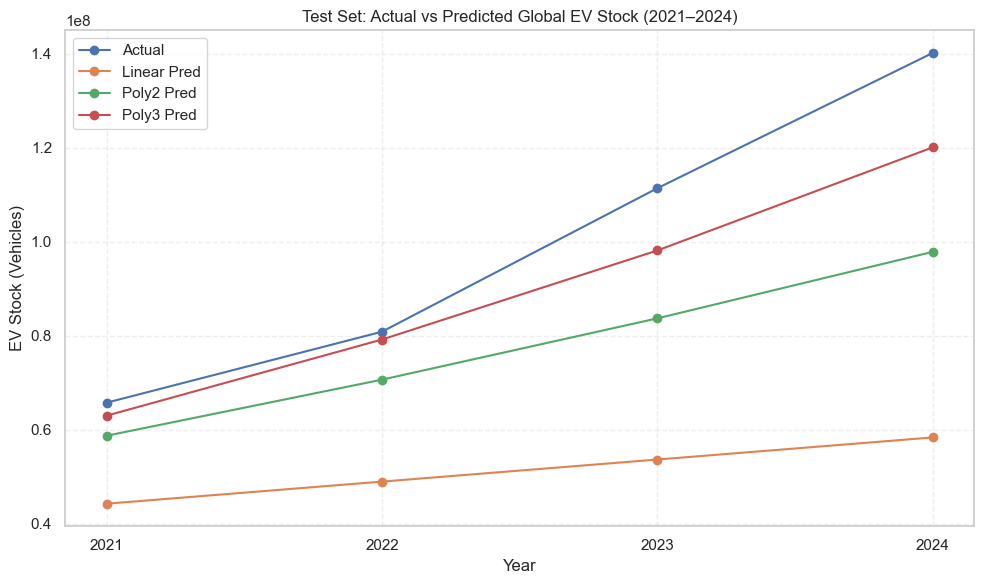

In [37]:
import matplotlib.pyplot as plt

test_years = global_stock.loc[test_mask, "year"].values

plt.figure(figsize=(10, 6))
plt.plot(test_years, y_test, marker="o", label="Actual")
plt.plot(test_years, y_pred_lin, marker="o", label="Linear Pred")
plt.plot(test_years, y_pred_poly2, marker="o", label="Poly2 Pred")
plt.plot(test_years, y_pred_poly3, marker="o", label="Poly3 Pred")

plt.title("Test Set: Actual vs Predicted Global EV Stock (2021–2024)")
plt.xlabel("Year")
plt.ylabel("EV Stock (Vehicles)")
plt.xticks(test_years)
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
rmse_values = {
    "Linear": rmse_lin,
    "Poly2": rmse_poly2,
    "Poly3": rmse_poly3
}

best_name = min(rmse_values, key=rmse_values.get)
best_name

'Poly3'

In [39]:
future_years = np.arange(2025, 2031).reshape(-1, 1)

if best_name == "Linear":
    future_pred = lin_model.predict(future_years)
elif best_name == "Poly2":
    future_pred = poly2_model.predict(future_years)
else:
    future_pred = poly3_model.predict(future_years)

forecast = pd.DataFrame({
    "year": future_years.flatten(),
    "predicted_ev_stock": future_pred
})

forecast

,year,predicted_ev_stock
0,2025,1.452857e+08
1,2026,1.739031e+08
2,2027,2.062119e+08
3,2028,2.424466e+08
4,2029,2.828417e+08
5,2030,3.276316e+08


In [40]:
results_sorted = results.sort_values("RMSE").reset_index(drop=True)
results_sorted

,Model,R2,MAE,RMSE
0,Polynomial (deg=3),0.8205,9.436089e+06,1.213511e+07
1,Polynomial (deg=2),0.1741,2.180432e+07,2.602876e+07
2,Linear,-2.5048,4.822073e+07,5.361926e+07


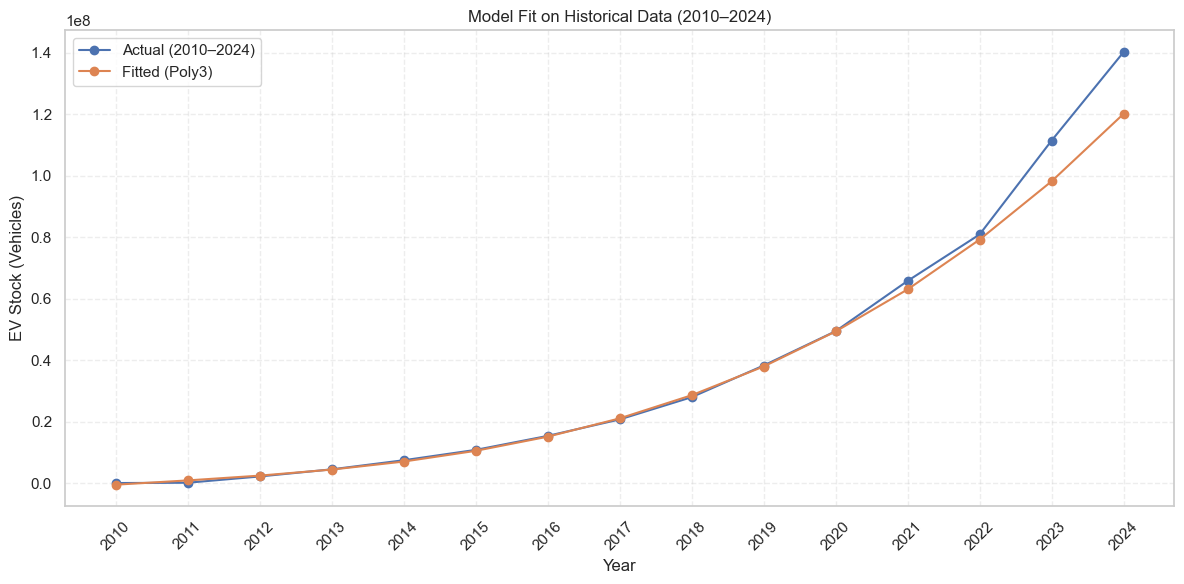

In [41]:
import numpy as np
import matplotlib.pyplot as plt

years_all = global_stock["year"].values.reshape(-1, 1)
y_all = global_stock["value"].values

if best_name == "Linear":
    y_fit = lin_model.predict(years_all)
elif best_name == "Poly2":
    y_fit = poly2_model.predict(years_all)
else:
    y_fit = poly3_model.predict(years_all)

plt.figure(figsize=(12, 6))
plt.plot(global_stock["year"], y_all, marker="o", label="Actual (2010–2024)")
plt.plot(global_stock["year"], y_fit, marker="o", label=f"Fitted ({best_name})")
plt.title("Model Fit on Historical Data (2010–2024)")
plt.xlabel("Year")
plt.ylabel("EV Stock (Vehicles)")
plt.xticks(range(2010, 2025), rotation=45)
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
forecast_m = forecast.copy()
forecast_m["predicted_ev_stock_million"] = forecast_m["predicted_ev_stock"] / 1e6
forecast_m[["year", "predicted_ev_stock_million"]].round(2)

,year,predicted_ev_stock_million
0,2025,145.29
1,2026,173.90
2,2027,206.21
3,2028,242.45
4,2029,282.84
5,2030,327.63


In [43]:
import pandas as pd
import numpy as np

df_sales_model = df[
    (df["parameter"] == "EV sales") &
    (df["region_country"] == "World") &
    (df["category"] != "Projection-STEPS") &
    (df["year"] <= 2024)
].copy()

global_sales = (
    df_sales_model.groupby("year")["value"]
    .sum()
    .reset_index()
    .sort_values("year")
)

global_sales.head(), global_sales.tail(), (global_sales["year"].min(), global_sales["year"].max())

(   year      value
 0  2010    50702.0
 1  2011    84050.0
 2  2012  2131150.0
 3  2013  2516118.0
 4  2014  3151566.0,
     year       value
 10  2020  11946009.0
 11  2021  17850265.0
 12  2022  20429803.0
 13  2023  24279760.0
 14  2024  28329902.0,
 (2010, 2024))

In [44]:
X_sales = global_sales[["year"]].values
y_sales = global_sales["value"].values

X_sales[:5], y_sales[:5]

(array([[2010],
        [2011],
        [2012],
        [2013],
        [2014]]),
 array([  50702.,   84050., 2131150., 2516118., 3151566.]))

In [45]:
train_mask_sales = global_sales["year"] <= 2020
test_mask_sales = global_sales["year"] >= 2021

X_train_sales = global_sales.loc[train_mask_sales, ["year"]].values
y_train_sales = global_sales.loc[train_mask_sales, "value"].values

X_test_sales = global_sales.loc[test_mask_sales, ["year"]].values
y_test_sales = global_sales.loc[test_mask_sales, "value"].values

X_train_sales.shape, X_test_sales.shape

((11, 1), (4, 1))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lin_sales = LinearRegression()
lin_sales.fit(X_train_sales, y_train_sales)

y_pred_lin_sales = lin_sales.predict(X_test_sales)

r2_lin_sales = r2_score(y_test_sales, y_pred_lin_sales)
mae_lin_sales = mean_absolute_error(y_test_sales, y_pred_lin_sales)
rmse_lin_sales = np.sqrt(mean_squared_error(y_test_sales, y_pred_lin_sales))

r2_lin_sales, mae_lin_sales, rmse_lin_sales

(-6.268111292686845, 10318437.72727257, 10687567.138729801)

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly2_sales = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

poly2_sales.fit(X_train_sales, y_train_sales)
y_pred_poly2_sales = poly2_sales.predict(X_test_sales)

r2_poly2_sales = r2_score(y_test_sales, y_pred_poly2_sales)
mae_poly2_sales = mean_absolute_error(y_test_sales, y_pred_poly2_sales)
rmse_poly2_sales = np.sqrt(mean_squared_error(y_test_sales, y_pred_poly2_sales))

r2_poly2_sales, mae_poly2_sales, rmse_poly2_sales

(-1.2938735982080969, 5877515.466201782, 6004167.687903641)

In [48]:
poly3_sales = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lr", LinearRegression())
])

poly3_sales.fit(X_train_sales, y_train_sales)
y_pred_poly3_sales = poly3_sales.predict(X_test_sales)

r2_poly3_sales = r2_score(y_test_sales, y_pred_poly3_sales)
mae_poly3_sales = mean_absolute_error(y_test_sales, y_pred_poly3_sales)
rmse_poly3_sales = np.sqrt(mean_squared_error(y_test_sales, y_pred_poly3_sales))

r2_poly3_sales, mae_poly3_sales, rmse_poly3_sales

(0.447463787585331, 2318777.7109375, 2946784.9607286975)

In [49]:
results_sales = pd.DataFrame({
    "Model": ["Linear", "Polynomial (deg=2)", "Polynomial (deg=3)"],
    "R2": [r2_lin_sales, r2_poly2_sales, r2_poly3_sales],
    "MAE": [mae_lin_sales, mae_poly2_sales, mae_poly3_sales],
    "RMSE": [rmse_lin_sales, rmse_poly2_sales, rmse_poly3_sales]
}).round(4)

results_sales

,Model,R2,MAE,RMSE
0,Linear,-6.2681,1.031844e+07,1.068757e+07
1,Polynomial (deg=2),-1.2939,5.877515e+06,6.004168e+06
2,Polynomial (deg=3),0.4475,2.318778e+06,2.946785e+06


In [50]:
rmse_sales = {
    "Linear": rmse_lin_sales,
    "Poly2": rmse_poly2_sales,
    "Poly3": rmse_poly3_sales
}

best_sales_name = min(rmse_sales, key=rmse_sales.get)
best_sales_name

'Poly3'

In [51]:
future_years = np.arange(2025, 2031).reshape(-1, 1)

if best_sales_name == "Linear":
    future_sales_pred = lin_sales.predict(future_years)
elif best_sales_name == "Poly2":
    future_sales_pred = poly2_sales.predict(future_years)
else:
    future_sales_pred = poly3_sales.predict(future_years)

forecast_sales = pd.DataFrame({
    "year": future_years.flatten(),
    "predicted_ev_sales": future_sales_pred
})

forecast_sales

,year,predicted_ev_sales
0,2025,4.196629e+07
1,2026,5.203787e+07
2,2027,6.378119e+07
3,2028,7.733123e+07
4,2029,9.282296e+07
5,2030,1.103914e+08


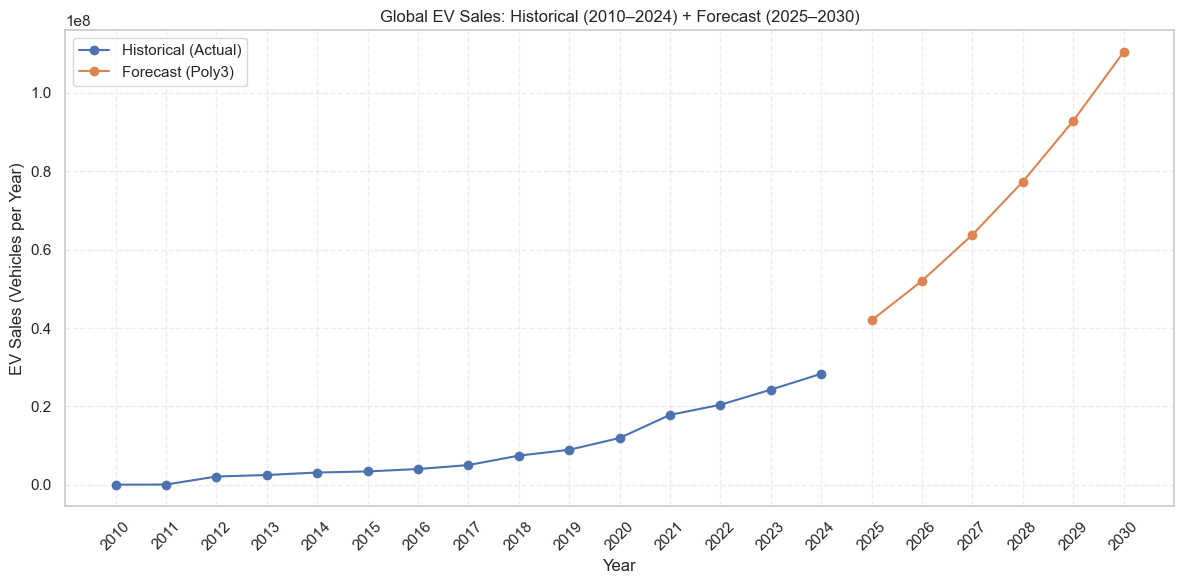

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(global_sales["year"], global_sales["value"], marker="o", label="Historical (Actual)")

plt.plot(forecast_sales["year"], forecast_sales["predicted_ev_sales"], marker="o",
         label=f"Forecast ({best_sales_name})")

plt.title("Global EV Sales: Historical (2010–2024) + Forecast (2025–2030)")
plt.xlabel("Year")
plt.ylabel("EV Sales (Vehicles per Year)")
plt.xticks(range(2010, 2031), rotation=45)
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
# Combine EV stock and EV sales model results

combined_results = pd.DataFrame({
    "Target": ["EV Stock", "EV Stock", "EV Stock", "EV Sales", "EV Sales", "EV Sales"],
    "Model": [
        "Linear", "Polynomial (deg=2)", "Polynomial (deg=3)",
        "Linear", "Polynomial (deg=2)", "Polynomial (deg=3)"
    ],
    "R2": [
        r2_lin, r2_poly2, r2_poly3,
        r2_lin_sales, r2_poly2_sales, r2_poly3_sales
    ],
    "MAE": [
        mae_lin, mae_poly2, mae_poly3,
        mae_lin_sales, mae_poly2_sales, mae_poly3_sales
    ],
    "RMSE": [
        rmse_lin, rmse_poly2, rmse_poly3,
        rmse_lin_sales, rmse_poly2_sales, rmse_poly3_sales
    ]
}).round(4)

combined_results

,Target,Model,R2,MAE,RMSE
0,EV Stock,Linear,-2.5048,4.822073e+07,5.361926e+07
1,EV Stock,Polynomial (deg=2),0.1741,2.180432e+07,2.602876e+07
2,EV Stock,Polynomial (deg=3),0.8205,9.436089e+06,1.213511e+07
3,EV Sales,Linear,-6.2681,1.031844e+07,1.068757e+07
4,EV Sales,Polynomial (deg=2),-1.2939,5.877515e+06,6.004168e+06
5,EV Sales,Polynomial (deg=3),0.4475,2.318778e+06,2.946785e+06


In [54]:
forecast_stock_m = forecast.copy()
forecast_stock_m["predicted_ev_stock_million"] = forecast_stock_m["predicted_ev_stock"] / 1e6

forecast_stock_m[["year", "predicted_ev_stock_million"]].round(2)

,year,predicted_ev_stock_million
0,2025,145.29
1,2026,173.90
2,2027,206.21
3,2028,242.45
4,2029,282.84
5,2030,327.63


In [55]:
forecast_sales_m = forecast_sales.copy()
forecast_sales_m["predicted_ev_sales_million"] = forecast_sales_m["predicted_ev_sales"] / 1e6

forecast_sales_m[["year", "predicted_ev_sales_million"]].round(2)

,year,predicted_ev_sales_million
0,2025,41.97
1,2026,52.04
2,2027,63.78
3,2028,77.33
4,2029,92.82
5,2030,110.39


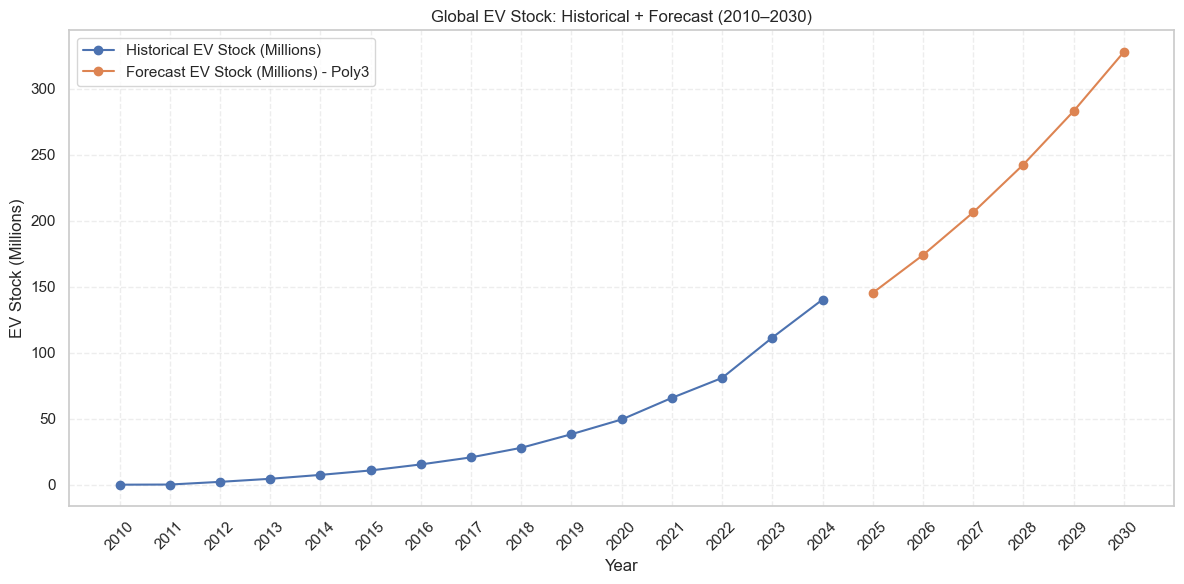

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(global_stock["year"], global_stock["value"] / 1e6, marker="o", label="Historical EV Stock (Millions)")
plt.plot(forecast["year"], forecast["predicted_ev_stock"] / 1e6, marker="o",
         label=f"Forecast EV Stock (Millions) - {best_name}")

plt.title("Global EV Stock: Historical + Forecast (2010–2030)")
plt.xlabel("Year")
plt.ylabel("EV Stock (Millions)")
plt.xticks(range(2010, 2031), rotation=45)
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

---
# Additional Visualizations: Factors Driving EV Growth

In [57]:
# Professional Plot Settings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (14, 7),
    'figure.dpi': 120,
    'font.size': 12,
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

## Factor 1: Market Growth - Global EV Stock

In [58]:
# Global EV Stock Data
ev_stock_global = df[
    (df['parameter'] == 'EV stock') & 
    (df['region_country'] == 'World')
].groupby('year')['value'].sum().reset_index()
ev_stock_global.columns = ['Year', 'EV_Stock']
ev_stock_global['EV_Millions'] = ev_stock_global['EV_Stock'] / 1e6

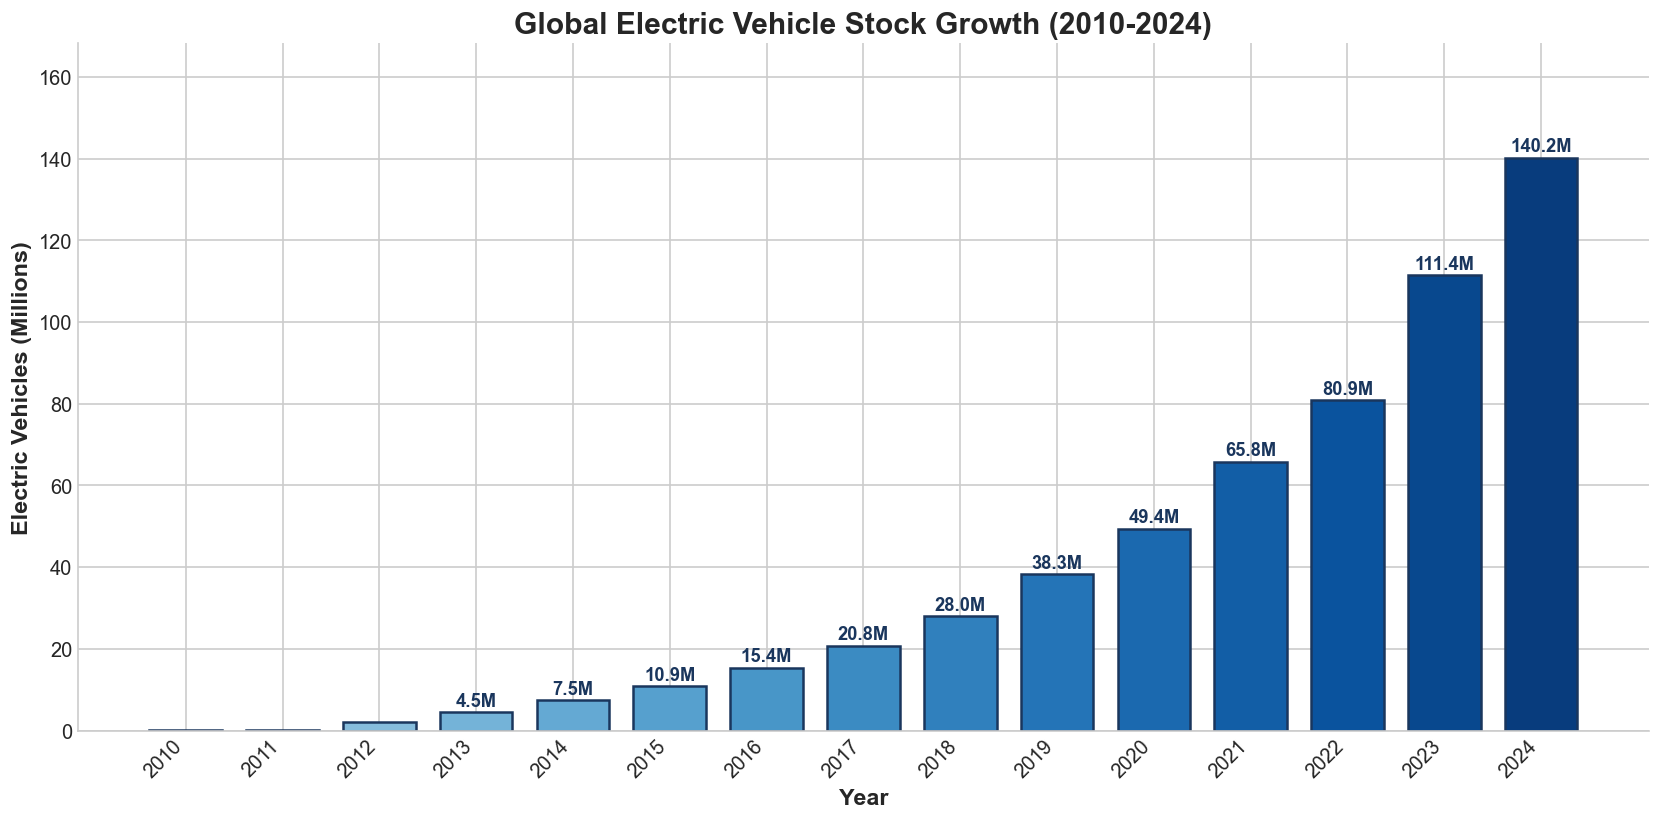

In [59]:
# Visualization: Global EV Stock Growth
plt.figure(figsize=(14, 7))

colors = plt.cm.Blues(np.linspace(0.35, 0.95, len(ev_stock_global)))
bars = plt.bar(ev_stock_global['Year'], ev_stock_global['EV_Millions'], 
               color=colors, edgecolor='#1a365d', linewidth=1.5, width=0.75)

for bar in bars:
    height = bar.get_height()
    if height > 3:
        plt.text(bar.get_x() + bar.get_width()/2., height + 1.5,
                f'{height:.1f}M', ha='center', fontsize=11, fontweight='bold', color='#1a365d')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Electric Vehicles (Millions)', fontweight='bold')
plt.title('Global Electric Vehicle Stock Growth (2010-2024)')
plt.xticks(ev_stock_global['Year'], rotation=45, ha='right')
plt.ylim(0, ev_stock_global['EV_Millions'].max() * 1.2)
plt.tight_layout()
plt.show()

## Factor 2: Consumer Demand - Annual EV Sales

In [60]:
# Global EV Sales Data
ev_sales_global = df[
    (df['parameter'] == 'EV sales') & 
    (df['region_country'] == 'World')
].groupby('year')['value'].sum().reset_index()
ev_sales_global.columns = ['Year', 'EV_Sales']
ev_sales_global['EV_Millions'] = ev_sales_global['EV_Sales'] / 1e6

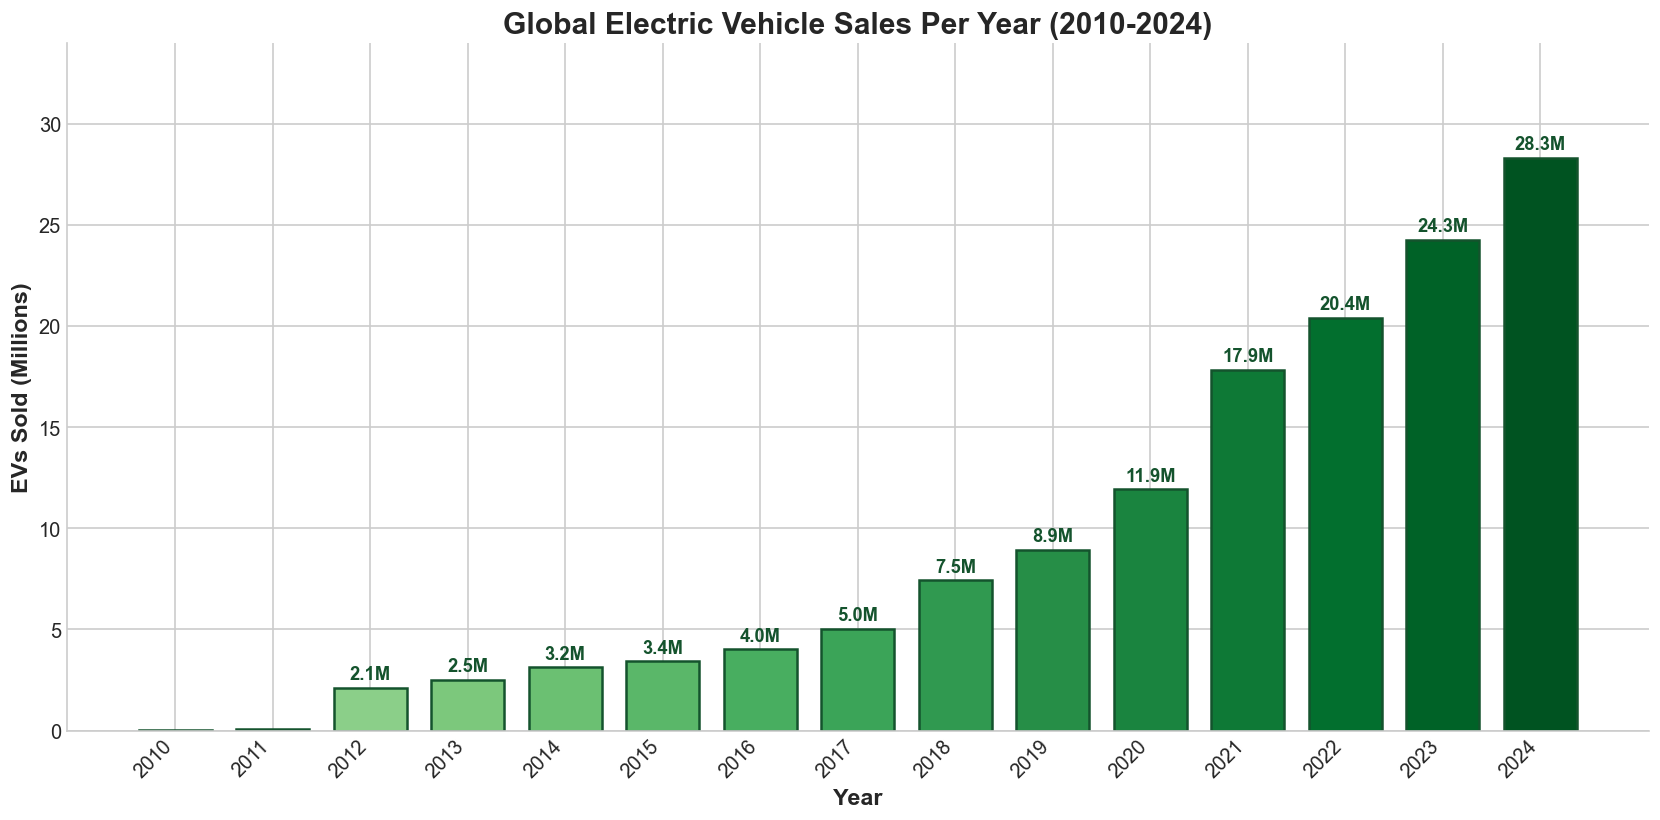

In [61]:
# Visualization: Annual EV Sales
plt.figure(figsize=(14, 7))

colors = plt.cm.Greens(np.linspace(0.35, 0.95, len(ev_sales_global)))
bars = plt.bar(ev_sales_global['Year'], ev_sales_global['EV_Millions'], 
               color=colors, edgecolor='#14532d', linewidth=1.5, width=0.75)

for bar in bars:
    height = bar.get_height()
    if height > 0.8:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.4,
                f'{height:.1f}M', ha='center', fontsize=11, fontweight='bold', color='#14532d')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EVs Sold (Millions)', fontweight='bold')
plt.title('Global Electric Vehicle Sales Per Year (2010-2024)')
plt.xticks(ev_sales_global['Year'], rotation=45, ha='right')
plt.ylim(0, ev_sales_global['EV_Millions'].max() * 1.2)
plt.tight_layout()
plt.show()

## Factor 3: Government Policies - Top Countries by EV Stock

In [62]:
# Top 10 Countries by EV Stock (2024)
exclude = ['World', 'Europe', 'EU27', 'Asia Pacific', 'North America', 'Rest of the world']
top_countries = df[
    (df['parameter'] == 'EV stock') & 
    (df['year'] == 2024) &
    (~df['region_country'].isin(exclude))
].groupby('region_country')['value'].sum().sort_values(ascending=True).tail(10)

top_countries_df = pd.DataFrame({
    'Country': top_countries.index,
    'EV_Millions': top_countries.values / 1e6
})

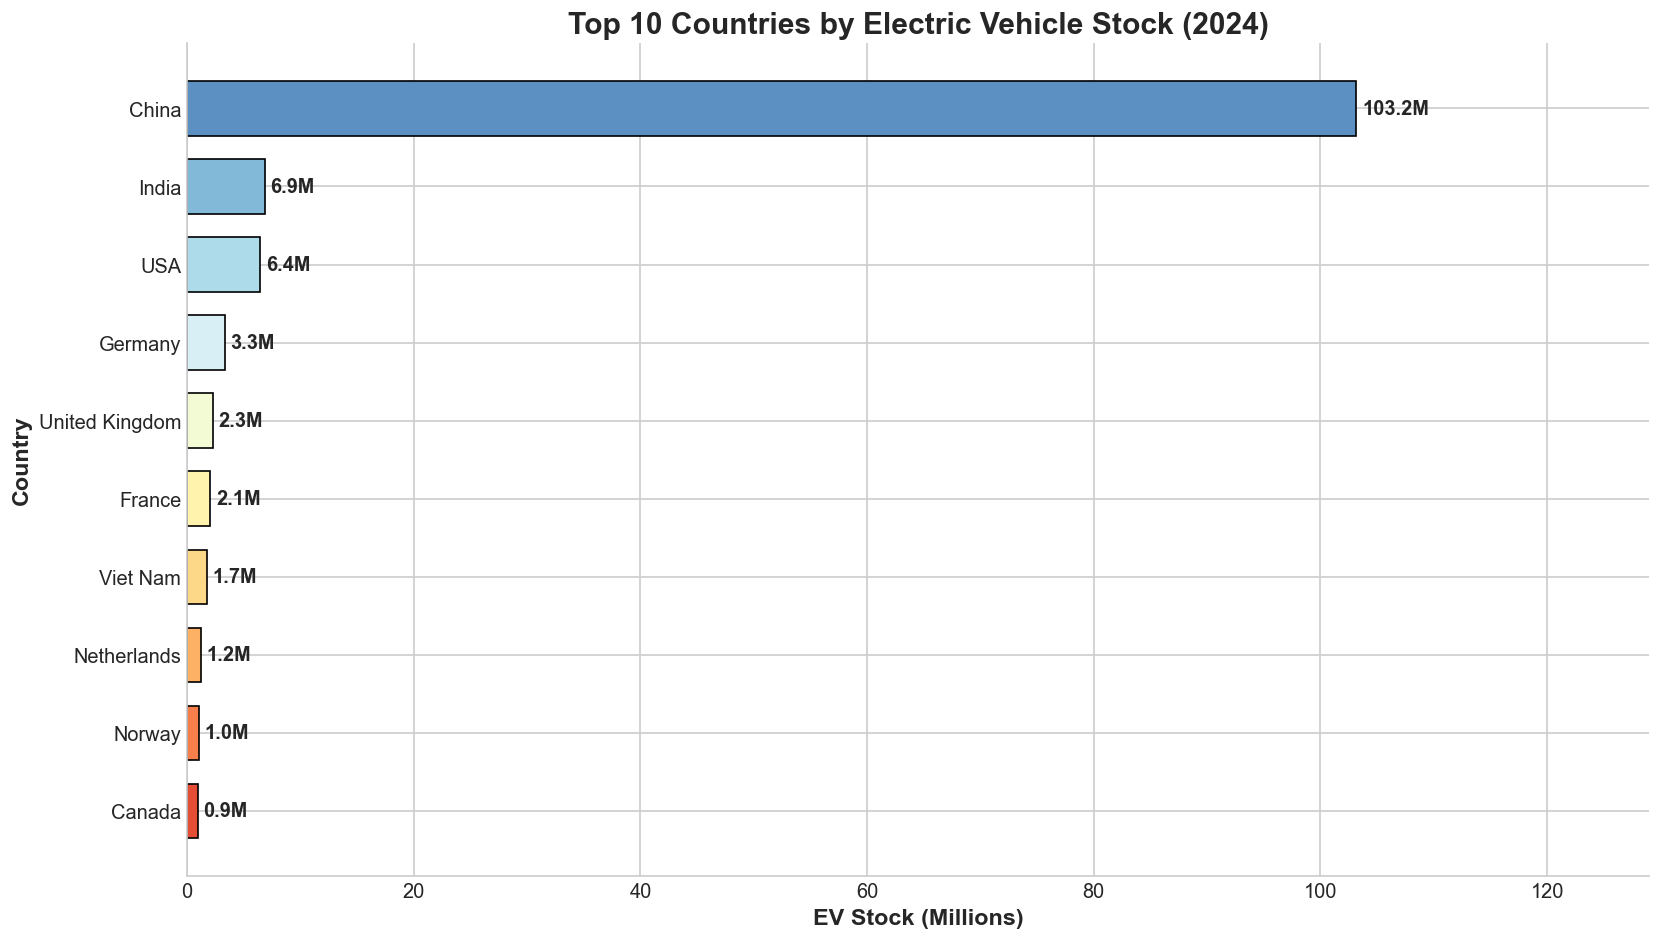

In [63]:
# Visualization: Top 10 Countries
plt.figure(figsize=(14, 8))

colors = plt.cm.RdYlBu(np.linspace(0.15, 0.85, len(top_countries_df)))
bars = plt.barh(top_countries_df['Country'], top_countries_df['EV_Millions'],
                color=colors, edgecolor='black', linewidth=1, height=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}M', ha='left', va='center', fontsize=12, fontweight='bold')

plt.xlabel('EV Stock (Millions)', fontweight='bold')
plt.ylabel('Country', fontweight='bold')
plt.title('Top 10 Countries by Electric Vehicle Stock (2024)')
plt.xlim(0, top_countries_df['EV_Millions'].max() * 1.25)
plt.tight_layout()
plt.show()

## Factor 4: Policy Effectiveness - EV Sales Share by Country

In [64]:
# EV Sales Share Data (% of total car sales that are EVs)
sales_share = df[
    (df['parameter'] == 'EV sales share') & 
    (df['mode'] == 'Cars') &
    (df['year'] == 2024) &
    (~df['region_country'].isin(['World', 'Europe', 'EU27', 'Asia Pacific']))
].groupby('region_country')['value'].mean().sort_values(ascending=True).tail(12)

sales_share_df = pd.DataFrame({
    'Country': sales_share.index,
    'Sales_Share': sales_share.values
})

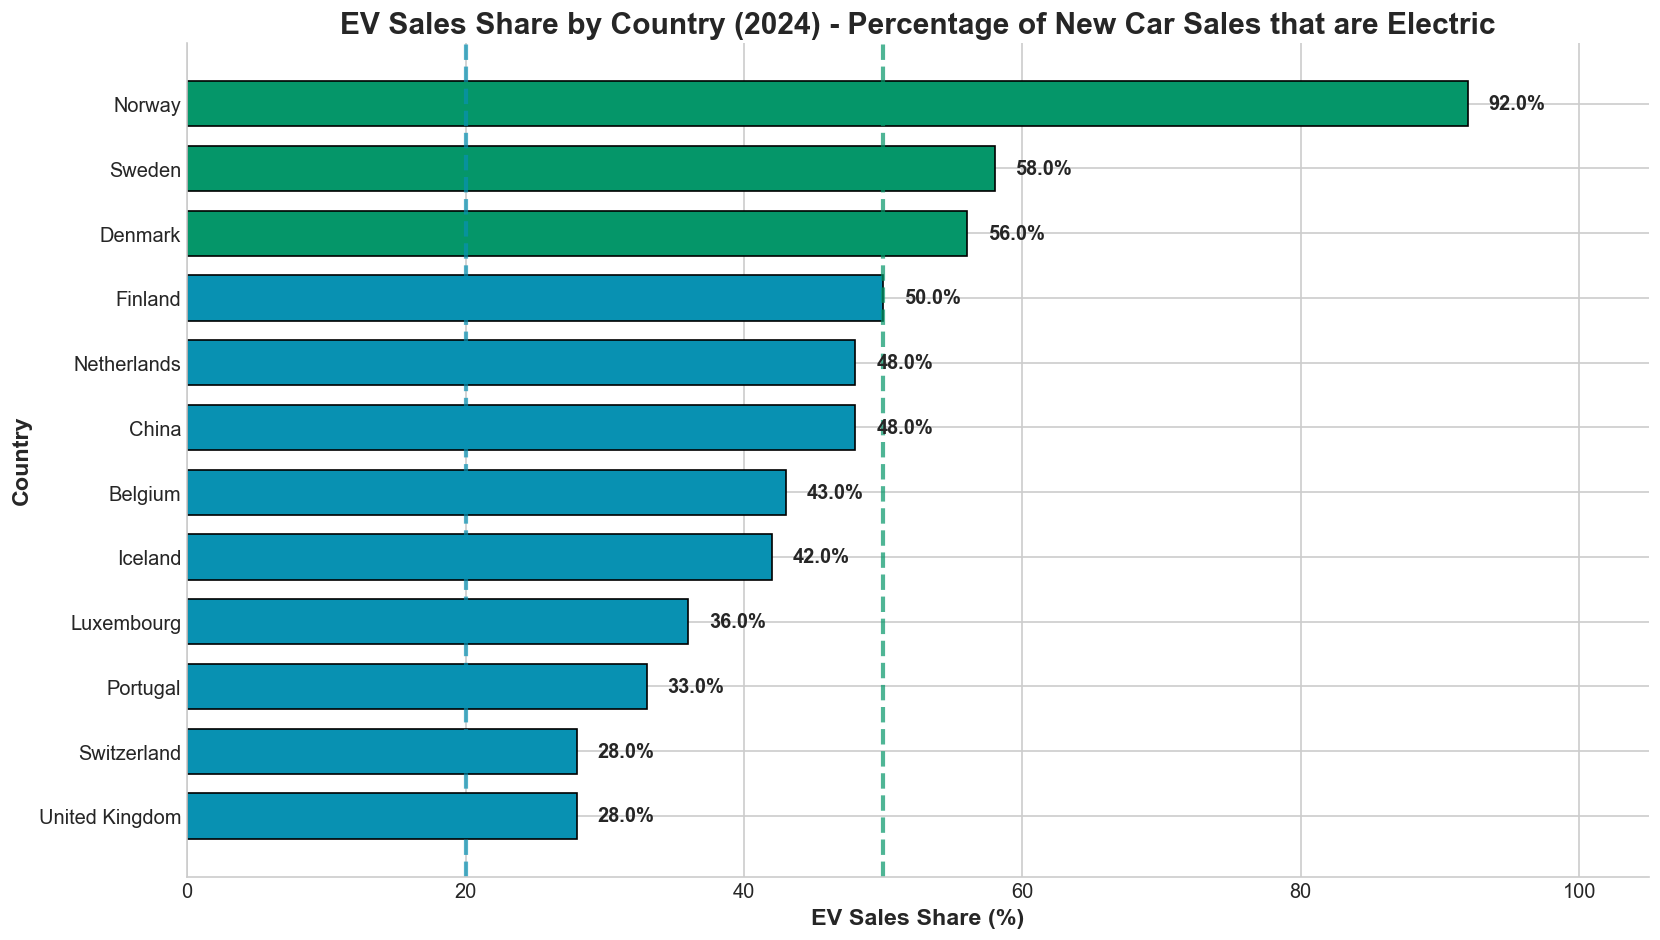

In [65]:
# Visualization: EV Sales Share by Country
plt.figure(figsize=(14, 8))

colors = ['#059669' if x > 50 else '#0891b2' if x > 20 else '#dc2626' for x in sales_share_df['Sales_Share']]
bars = plt.barh(sales_share_df['Country'], sales_share_df['Sales_Share'],
                color=colors, edgecolor='black', linewidth=1, height=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1.5, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', ha='left', va='center', fontsize=12, fontweight='bold')

plt.axvline(x=50, color='#059669', linestyle='--', linewidth=2.5, alpha=0.7)
plt.axvline(x=20, color='#0891b2', linestyle='--', linewidth=2.5, alpha=0.7)

plt.xlabel('EV Sales Share (%)', fontweight='bold')
plt.ylabel('Country', fontweight='bold')
plt.title('EV Sales Share by Country (2024) - Percentage of New Car Sales that are Electric')
plt.xlim(0, 105)
plt.tight_layout()
plt.show()

## Factor 5: Infrastructure - Charging Points Growth

In [66]:
# Charging Infrastructure Data
charging = df[
    (df['parameter'] == 'EV charging points') & 
    (df['region_country'] == 'World')
].groupby('year')['value'].sum().reset_index()
charging.columns = ['Year', 'Charging_Points']
charging['Charging_Thousands'] = charging['Charging_Points'] / 1e3

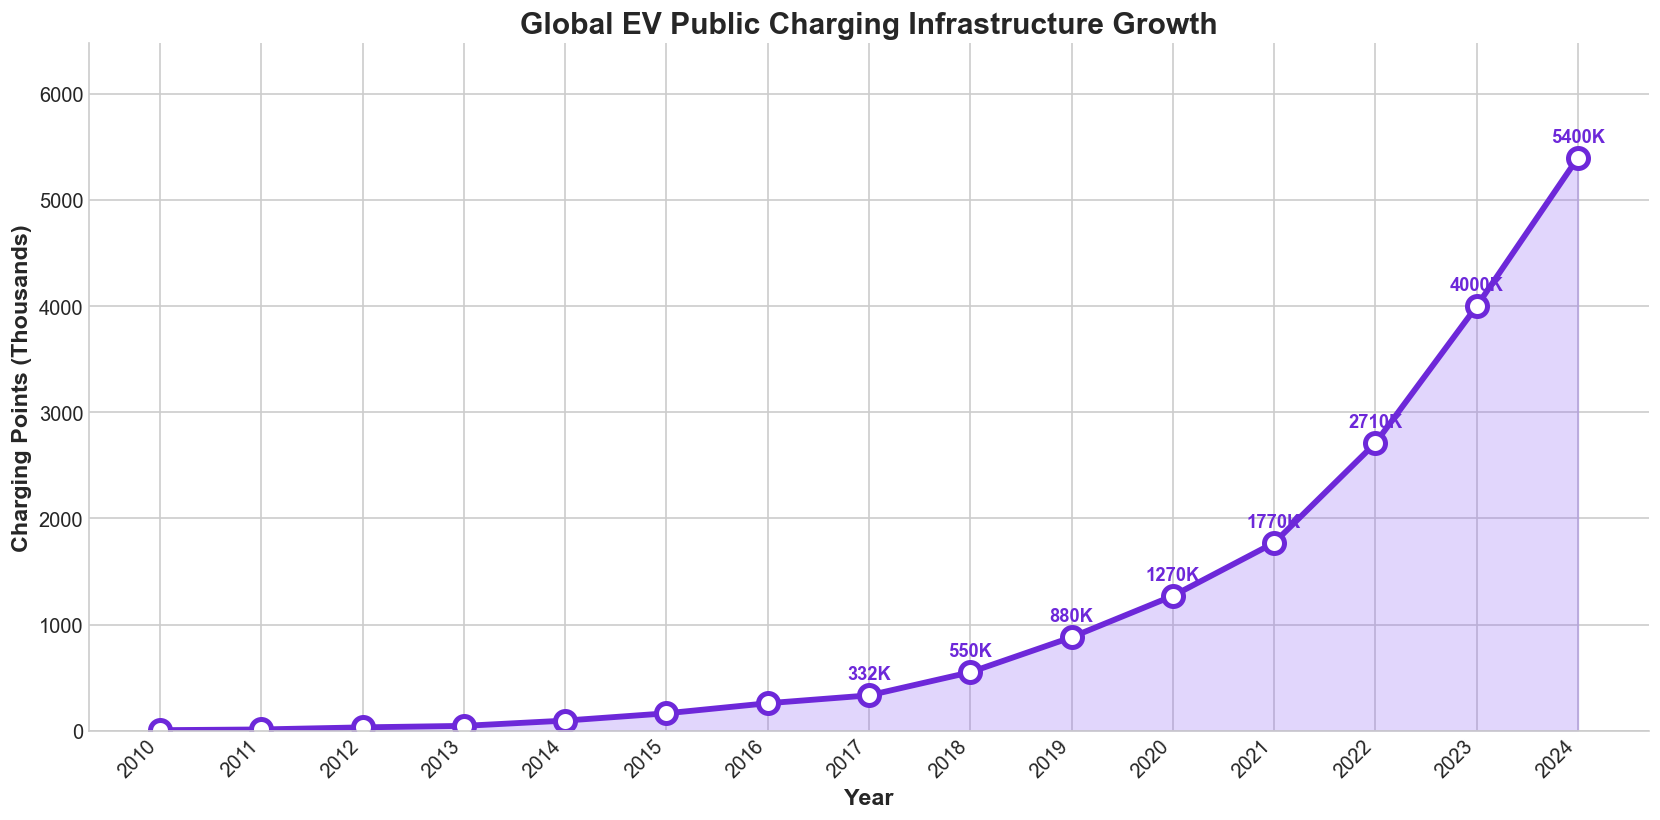

In [67]:
# Visualization: Charging Infrastructure Growth
plt.figure(figsize=(14, 7))

plt.fill_between(charging['Year'], charging['Charging_Thousands'], 
                 color='#8b5cf6', alpha=0.25)
plt.plot(charging['Year'], charging['Charging_Thousands'], 
         marker='o', color='#6d28d9', linewidth=3.5, markersize=12,
         markerfacecolor='white', markeredgewidth=3)

for i, row in charging.iterrows():
    if row['Charging_Thousands'] > 300:
        plt.text(row['Year'], row['Charging_Thousands'] + 150,
                f"{row['Charging_Thousands']:.0f}K", ha='center', fontsize=11, fontweight='bold', color='#6d28d9')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Charging Points (Thousands)', fontweight='bold')
plt.title('Global EV Public Charging Infrastructure Growth')
plt.xticks(charging['Year'], rotation=45, ha='right')
plt.ylim(0, charging['Charging_Thousands'].max() * 1.2)
plt.tight_layout()
plt.show()

## Factor 6: Environmental Impact - Oil Displacement

In [68]:
# Oil Displacement Data
oil = df[
    (df['parameter'] == 'Oil displacement, million lge') & 
    (df['region_country'] == 'World')
].groupby('year')['value'].sum().reset_index()
oil.columns = ['Year', 'Oil_Displaced']

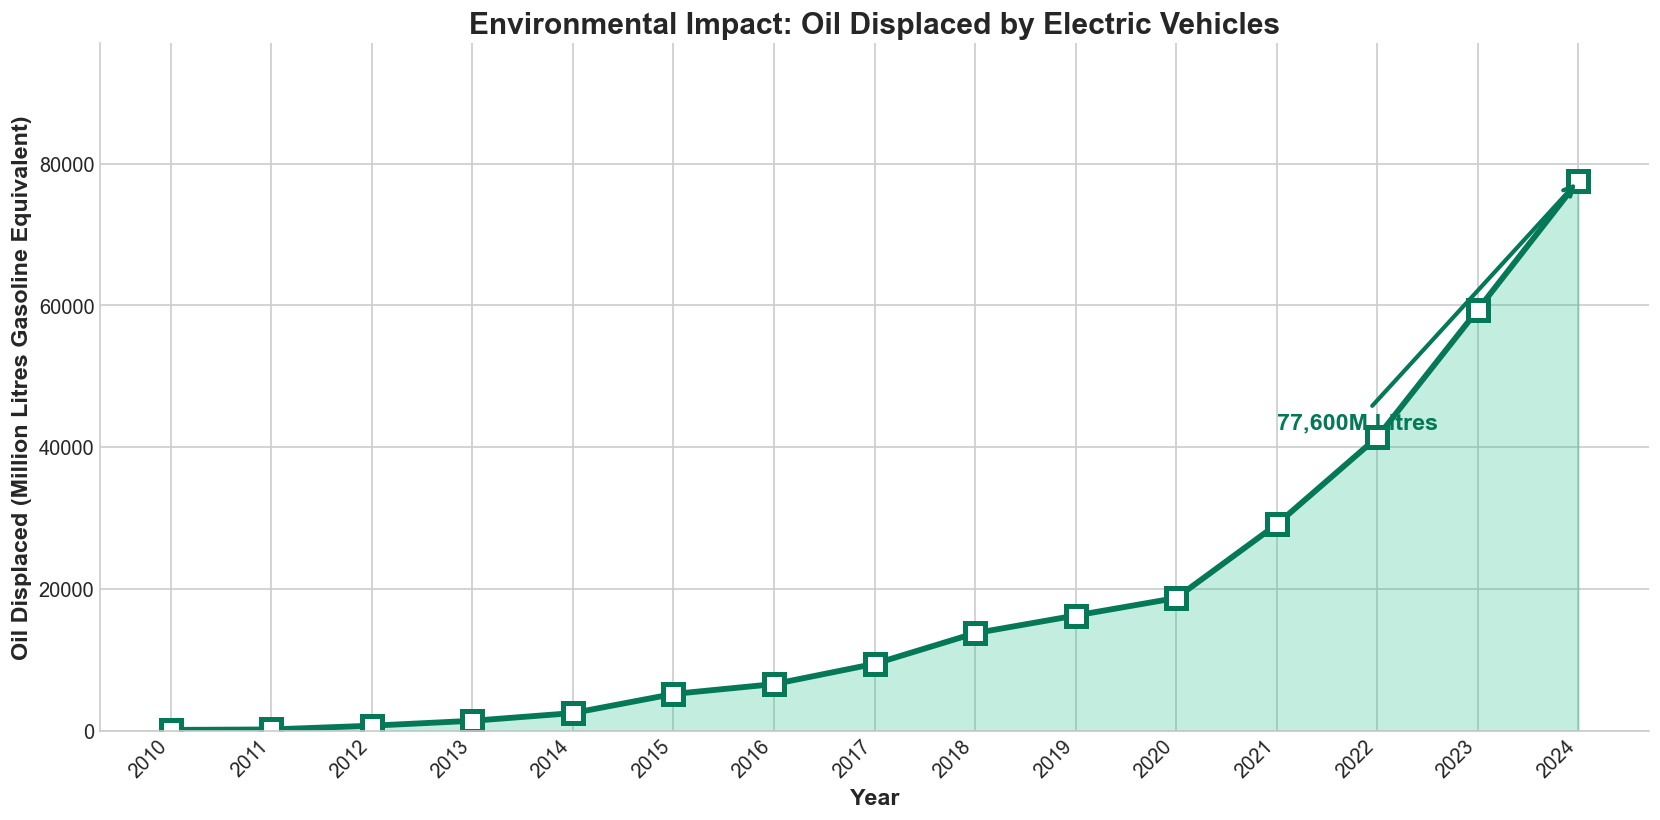

In [69]:
# Visualization: Oil Displacement
plt.figure(figsize=(14, 7))

plt.fill_between(oil['Year'], oil['Oil_Displaced'], color='#10b981', alpha=0.25)
plt.plot(oil['Year'], oil['Oil_Displaced'], 
         marker='s', color='#047857', linewidth=3.5, markersize=12,
         markerfacecolor='white', markeredgewidth=3)

latest = oil.iloc[-1]
plt.annotate(f"{latest['Oil_Displaced']:,.0f}M Litres", 
             xy=(latest['Year'], latest['Oil_Displaced']),
             xytext=(latest['Year']-3, latest['Oil_Displaced']*0.55),
             fontsize=14, fontweight='bold', color='#047857',
             arrowprops=dict(arrowstyle='->', color='#047857', lw=2.5))

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Oil Displaced (Million Litres Gasoline Equivalent)', fontweight='bold')
plt.title('Environmental Impact: Oil Displaced by Electric Vehicles')
plt.xticks(oil['Year'], rotation=45, ha='right')
plt.ylim(0, oil['Oil_Displaced'].max() * 1.25)
plt.tight_layout()
plt.show()

## Factor 7: Technology Shift - BEV vs PHEV

In [70]:
# BEV vs PHEV Data
powertrain = df[
    (df['parameter'] == 'EV stock') & 
    (df['region_country'] == 'World') &
    (df['powertrain'].isin(['BEV', 'PHEV']))
].groupby(['year', 'powertrain'])['value'].sum().reset_index()

powertrain_pivot = powertrain.pivot(index='year', columns='powertrain', values='value') / 1e6
powertrain_pivot['BEV_Share'] = (powertrain_pivot['BEV'] / (powertrain_pivot['BEV'] + powertrain_pivot['PHEV']) * 100).round(1)

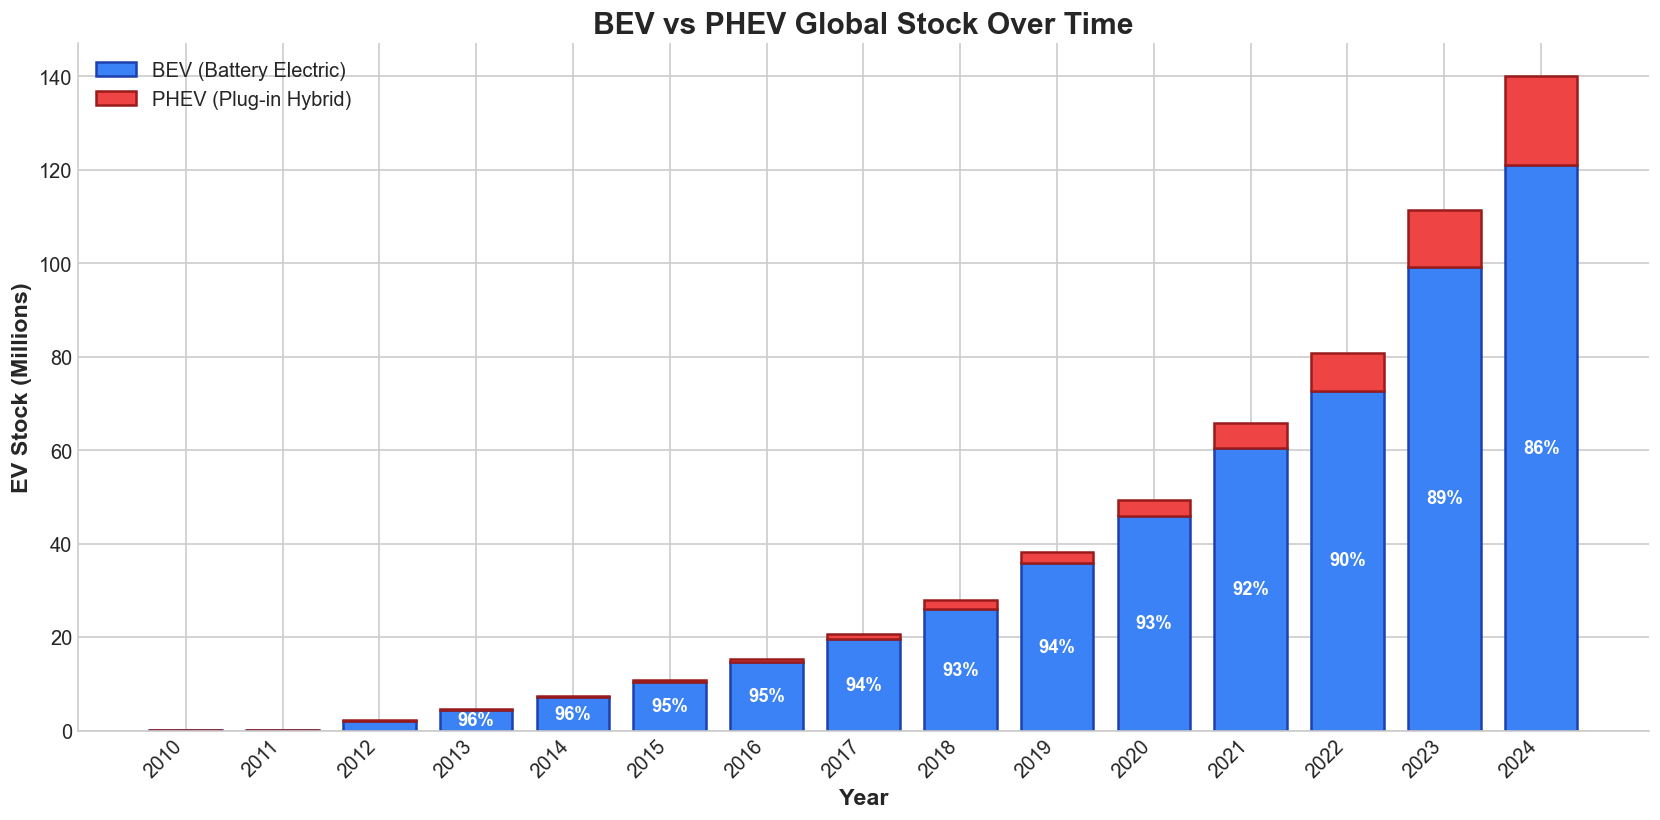

In [71]:
# Visualization: BEV vs PHEV
plt.figure(figsize=(14, 7))

x = np.arange(len(powertrain_pivot.index))
width = 0.75

plt.bar(x, powertrain_pivot['BEV'], width, label='BEV (Battery Electric)', 
        color='#3b82f6', edgecolor='#1e40af', linewidth=1.5)
plt.bar(x, powertrain_pivot['PHEV'], width, bottom=powertrain_pivot['BEV'],
        label='PHEV (Plug-in Hybrid)', color='#ef4444', edgecolor='#991b1b', linewidth=1.5)

for i, (year, pct) in enumerate(zip(powertrain_pivot.index, powertrain_pivot['BEV_Share'])):
    total = powertrain_pivot.loc[year, 'BEV'] + powertrain_pivot.loc[year, 'PHEV']
    if total > 3:
        plt.text(i, powertrain_pivot.loc[year, 'BEV']/2, f'{pct:.0f}%', 
                ha='center', va='center', fontsize=11, fontweight='bold', color='white')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Stock (Millions)', fontweight='bold')
plt.title('BEV vs PHEV Global Stock Over Time')
plt.xticks(x, powertrain_pivot.index, rotation=45, ha='right')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

## Factor 8: Growth Momentum - Year-over-Year Growth Rate

In [72]:
# Calculate YoY Growth Rate
ev_stock_global['YoY_Growth'] = ev_stock_global['EV_Stock'].pct_change() * 100
growth_data = ev_stock_global.dropna(subset=['YoY_Growth']).copy()

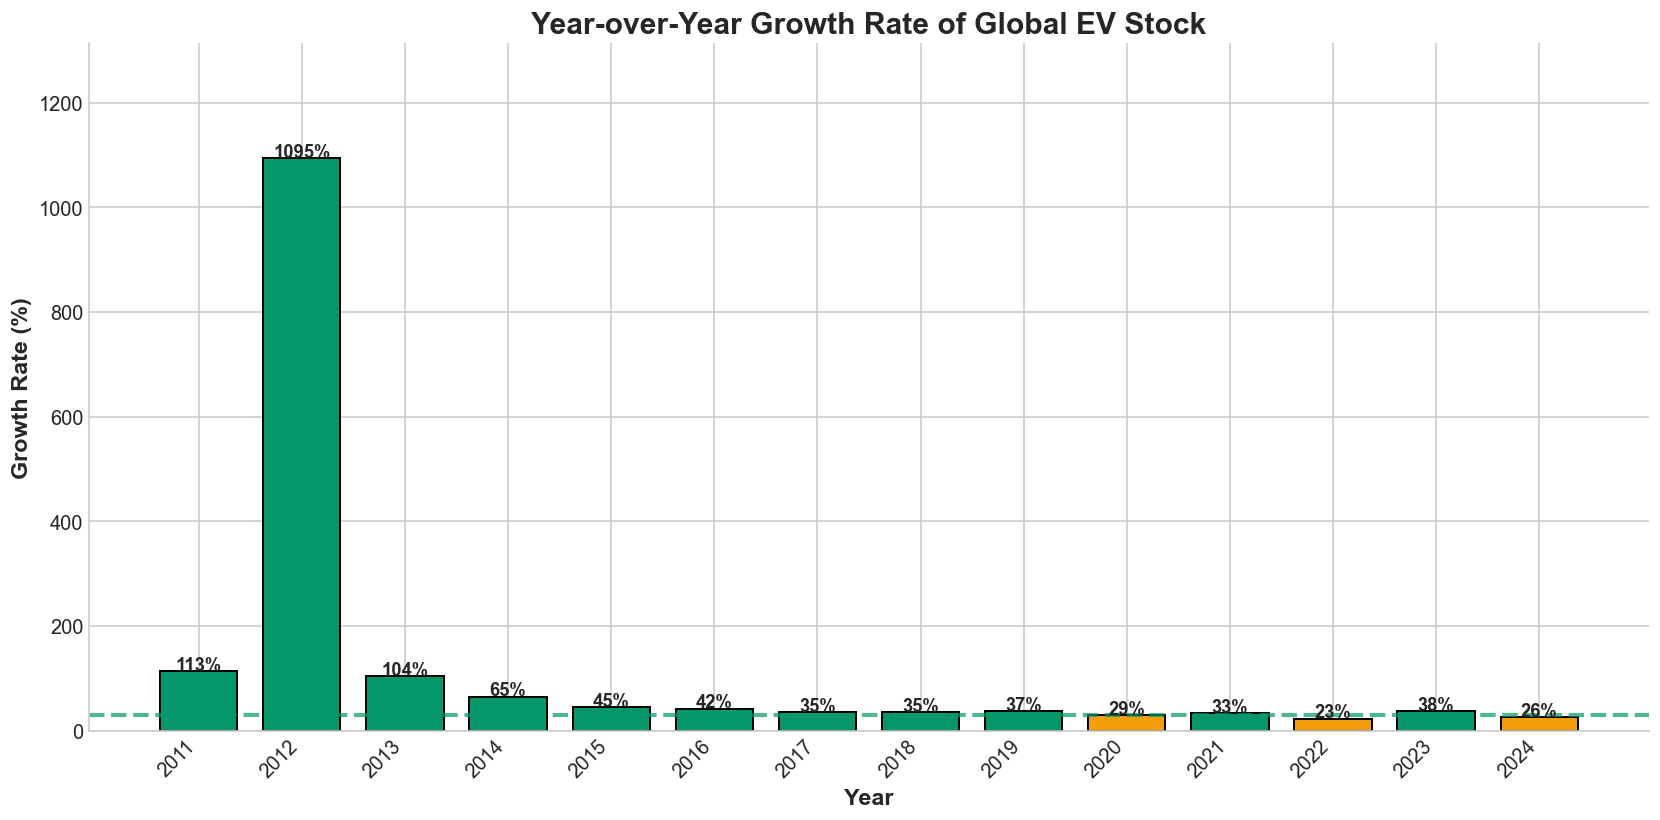

In [73]:
# Visualization: YoY Growth Rate
plt.figure(figsize=(14, 7))

colors = ['#059669' if x >= 30 else '#f59e0b' if x >= 20 else '#dc2626' for x in growth_data['YoY_Growth']]
bars = plt.bar(growth_data['Year'], growth_data['YoY_Growth'], 
               color=colors, edgecolor='black', linewidth=1.2, width=0.75)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.0f}%', ha='center', fontsize=11, fontweight='bold')

plt.axhline(y=30, color='#059669', linestyle='--', linewidth=2.5, alpha=0.7)

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Growth Rate (%)', fontweight='bold')
plt.title('Year-over-Year Growth Rate of Global EV Stock')
plt.xticks(growth_data['Year'], rotation=45, ha='right')
plt.ylim(0, growth_data['YoY_Growth'].max() * 1.2)
plt.tight_layout()
plt.show()

## Factor 9: Correlation Between EV Indicators

In [74]:
# Prepare Correlation Data
ev_stock_yr = df[(df['parameter'] == 'EV stock') & (df['region_country'] == 'World')].groupby('year')['value'].sum()
ev_sales_yr = df[(df['parameter'] == 'EV sales') & (df['region_country'] == 'World')].groupby('year')['value'].sum()
charging_yr = df[(df['parameter'] == 'EV charging points') & (df['region_country'] == 'World')].groupby('year')['value'].sum()
oil_yr = df[(df['parameter'] == 'Oil displacement, million lge') & (df['region_country'] == 'World')].groupby('year')['value'].sum()

corr_data = pd.DataFrame({
    'EV Stock': ev_stock_yr,
    'EV Sales': ev_sales_yr,
    'Charging Points': charging_yr,
    'Oil Displaced': oil_yr
}).dropna()

correlation_matrix = corr_data.corr()

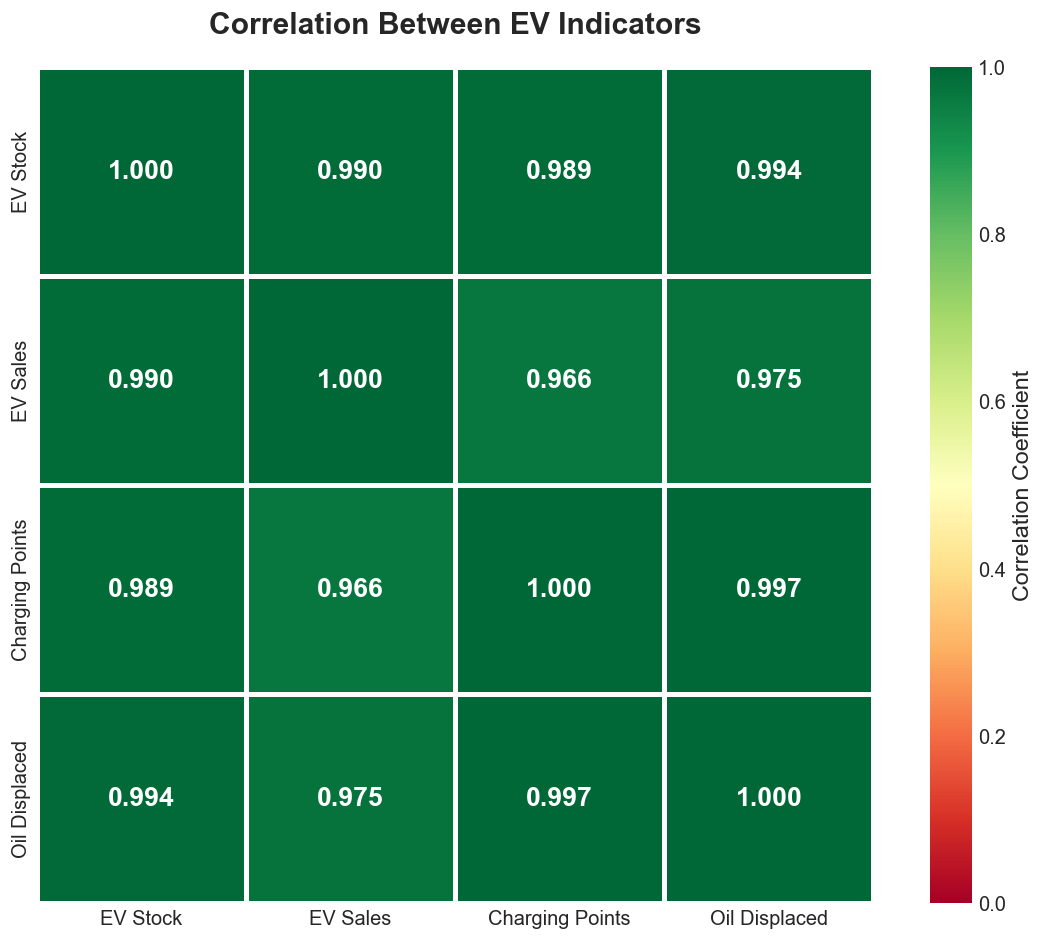

In [75]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, 
            annot=True, fmt='.3f',
            cmap='RdYlGn', center=0.5,
            square=True, linewidths=3,
            annot_kws={'size': 16, 'weight': 'bold'},
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=0, vmax=1)

plt.title('Correlation Between EV Indicators', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Factor 10: Policy Impact Over Time - Country Comparison

In [76]:
# Policy Countries EV Sales Share Over Time
policy_countries = ['Norway', 'China', 'Germany', 'USA', 'France', 'United Kingdom']

country_trend = df[
    (df['parameter'] == 'EV sales share') &
    (df['mode'] == 'Cars') &
    (df['region_country'].isin(policy_countries))
].groupby(['year', 'region_country'])['value'].mean().reset_index()

country_pivot = country_trend.pivot(index='year', columns='region_country', values='value')

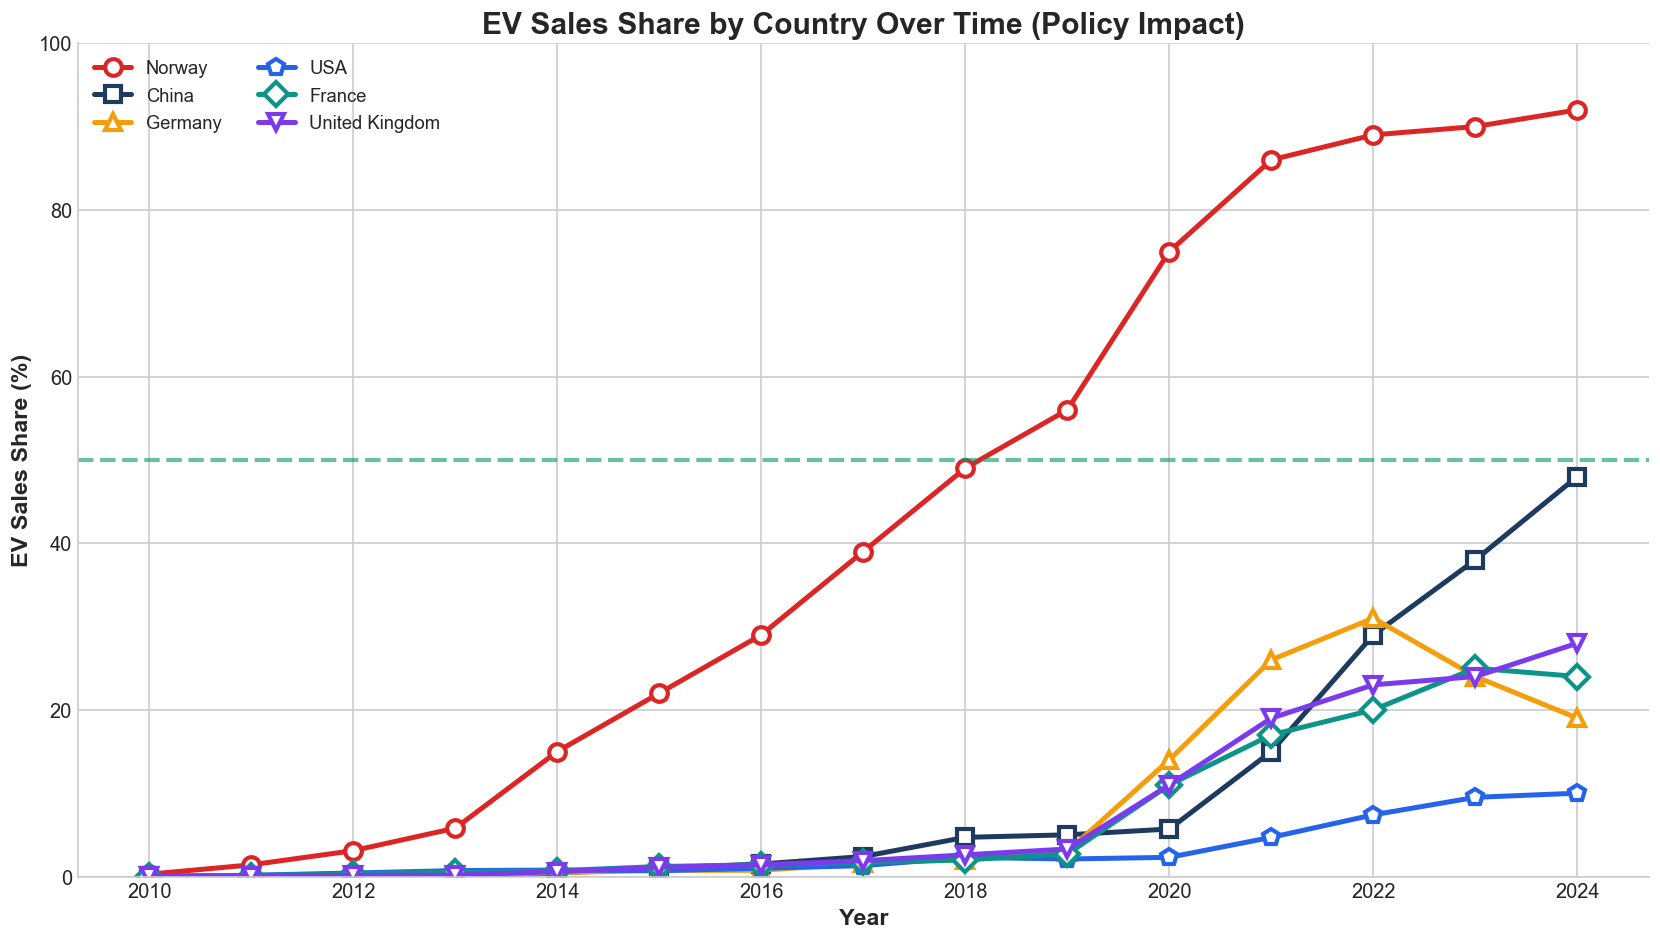

In [77]:
# Visualization: Policy Impact Over Time
plt.figure(figsize=(14, 8))

styles = {
    'Norway': {'color': '#dc2626', 'marker': 'o'},
    'China': {'color': '#1e3a5f', 'marker': 's'},
    'Germany': {'color': '#f59e0b', 'marker': '^'},
    'France': {'color': '#0d9488', 'marker': 'D'},
    'United Kingdom': {'color': '#7c3aed', 'marker': 'v'},
    'USA': {'color': '#2563eb', 'marker': 'p'}
}

for country in policy_countries:
    if country in country_pivot.columns:
        data = country_pivot[country].dropna()
        style = styles[country]
        plt.plot(data.index, data.values, 
                marker=style['marker'], color=style['color'], 
                linewidth=3, markersize=10,
                markerfacecolor='white', markeredgewidth=2.5,
                label=country)

plt.axhline(y=50, color='#059669', linestyle='--', linewidth=2.5, alpha=0.6)

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Sales Share (%)', fontweight='bold')
plt.title('EV Sales Share by Country Over Time (Policy Impact)')
plt.legend(loc='upper left', fontsize=11, ncol=2)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

---
# Regression Analysis and Future Predictions

## Simple Linear Regression

In [78]:
# Prepare Data for Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X = ev_stock_global[['Year']].values
y = ev_stock_global['EV_Stock'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)
y_pred_linear_all = linear_model.predict(X)

r2_linear = r2_score(y_test, y_pred_linear_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print(f"Simple Linear Regression:")
print(f"  R² Score: {r2_linear:.4f}")
print(f"  MAE: {mae_linear/1e6:.2f} Million")
print(f"  RMSE: {rmse_linear/1e6:.2f} Million")

Simple Linear Regression:
  R² Score: 0.2908
  MAE: 21.33 Million
  RMSE: 22.69 Million


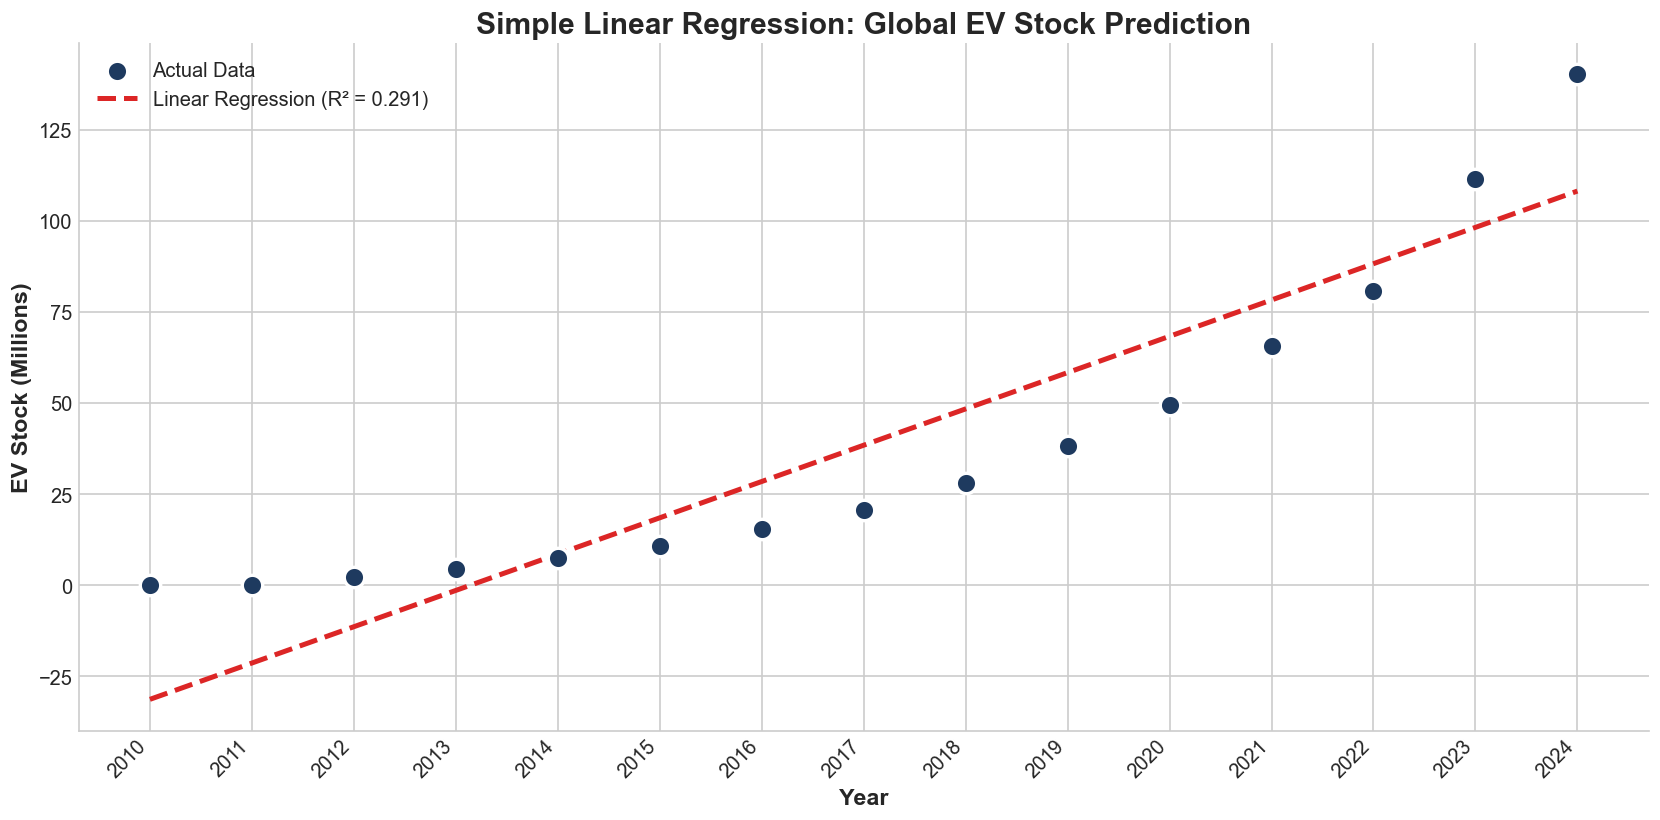

In [80]:
# Visualization: Simple Linear Regression
plt.figure(figsize=(14, 7))

plt.scatter(ev_stock_global['Year'], ev_stock_global['EV_Millions'], 
            s=150, color='#1e3a5f', edgecolor='white', linewidth=2, zorder=5, label='Actual Data')

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line_linear = linear_model.predict(X_line) / 1e6
plt.plot(X_line, y_line_linear, '--', color='#dc2626', linewidth=3, label=f'Linear Regression (R² = {r2_linear:.3f})')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Stock (Millions)', fontweight='bold')
plt.title('Simple Linear Regression: Global EV Stock Prediction')
plt.legend(loc='upper left', fontsize=12)
plt.xticks(ev_stock_global['Year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Multiple Linear Regression

In [81]:
# Prepare Multiple Regression Data (Year + Charging Points)
multi_data = ev_stock_global[['Year', 'EV_Stock']].merge(
    charging[['Year', 'Charging_Points']], on='Year', how='inner'
)

X_multi = multi_data[['Year', 'Charging_Points']].values
y_multi = multi_data['EV_Stock'].values

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [82]:
# Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_pred_multi_test = multi_model.predict(X_test_m)
y_pred_multi_all = multi_model.predict(X_multi)

r2_multi = r2_score(y_test_m, y_pred_multi_test)
mae_multi = mean_absolute_error(y_test_m, y_pred_multi_test)
rmse_multi = np.sqrt(mean_squared_error(y_test_m, y_pred_multi_test))

print(f"Multiple Linear Regression (Year + Charging Points):")
print(f"  R² Score: {r2_multi:.4f}")
print(f"  MAE: {mae_multi/1e6:.2f} Million")
print(f"  RMSE: {rmse_multi/1e6:.2f} Million")
print(f"  Coefficients: Year={multi_model.coef_[0]:,.0f}, Charging={multi_model.coef_[1]:.4f}")

Multiple Linear Regression (Year + Charging Points):
  R² Score: 0.9771
  MAE: 3.65 Million
  RMSE: 4.08 Million
  Coefficients: Year=2,578,563, Charging=20.1754


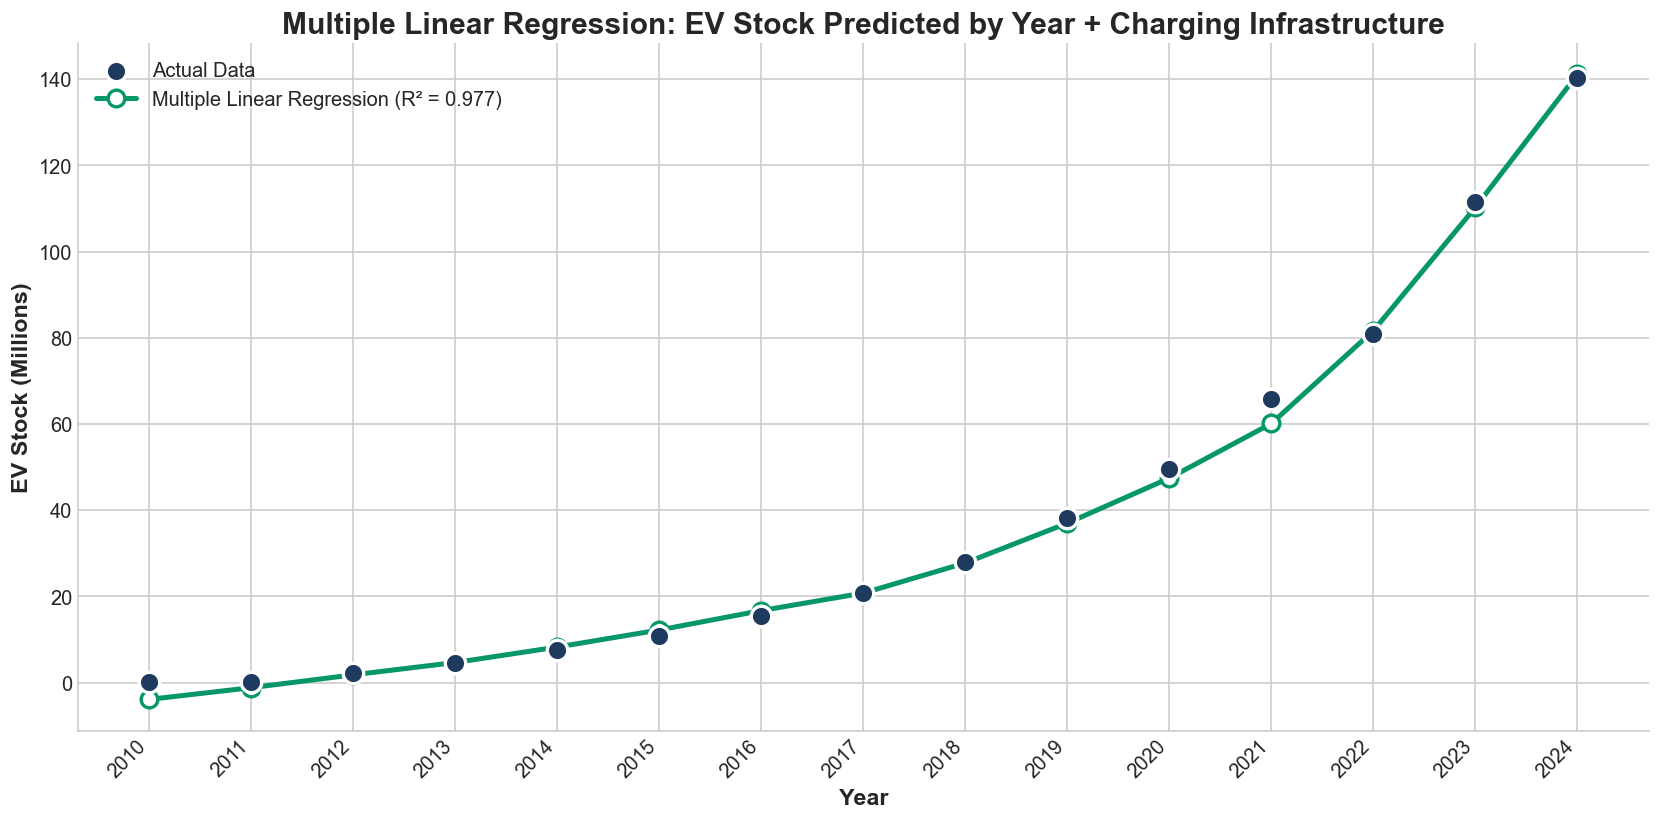

In [83]:
# Visualization: Multiple Linear Regression
plt.figure(figsize=(14, 7))

plt.scatter(multi_data['Year'], multi_data['EV_Stock']/1e6, 
            s=150, color='#1e3a5f', edgecolor='white', linewidth=2, zorder=5, label='Actual Data')
plt.plot(multi_data['Year'], y_pred_multi_all/1e6, 
         'o-', color='#059669', linewidth=3, markersize=10, 
         markerfacecolor='white', markeredgewidth=2,
         label=f'Multiple Linear Regression (R² = {r2_multi:.3f})')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Stock (Millions)', fontweight='bold')
plt.title('Multiple Linear Regression: EV Stock Predicted by Year + Charging Infrastructure')
plt.legend(loc='upper left', fontsize=12)
plt.xticks(multi_data['Year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Non-Linear Regression (Polynomial)

In [84]:
# Polynomial Regression - Degrees 2, 3, 4
poly_results = []

for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_p, y_train_p)
    y_pred_p = poly_model.predict(X_test_p)
    
    r2 = r2_score(y_test_p, y_pred_p)
    mae = mean_absolute_error(y_test_p, y_pred_p)
    rmse = np.sqrt(mean_squared_error(y_test_p, y_pred_p))
    
    poly_results.append({'Degree': degree, 'R2': r2, 'MAE': mae/1e6, 'RMSE': rmse/1e6})

poly_df = pd.DataFrame(poly_results)
print("Polynomial Regression Results:")
print(poly_df.round(4).to_string(index=False))

Polynomial Regression Results:
 Degree     R2    MAE   RMSE
      2 0.9245 6.6799 7.4021
      3 0.9805 3.0398 3.7644
      4 0.9806 3.0327 3.7534


In [85]:
# Fit Best Polynomial Model (Degree 3)
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)
poly3_model = LinearRegression()
poly3_model.fit(X_poly3, y)

y_pred_poly3 = poly3_model.predict(X_poly3)
r2_poly3 = r2_score(y, y_pred_poly3)

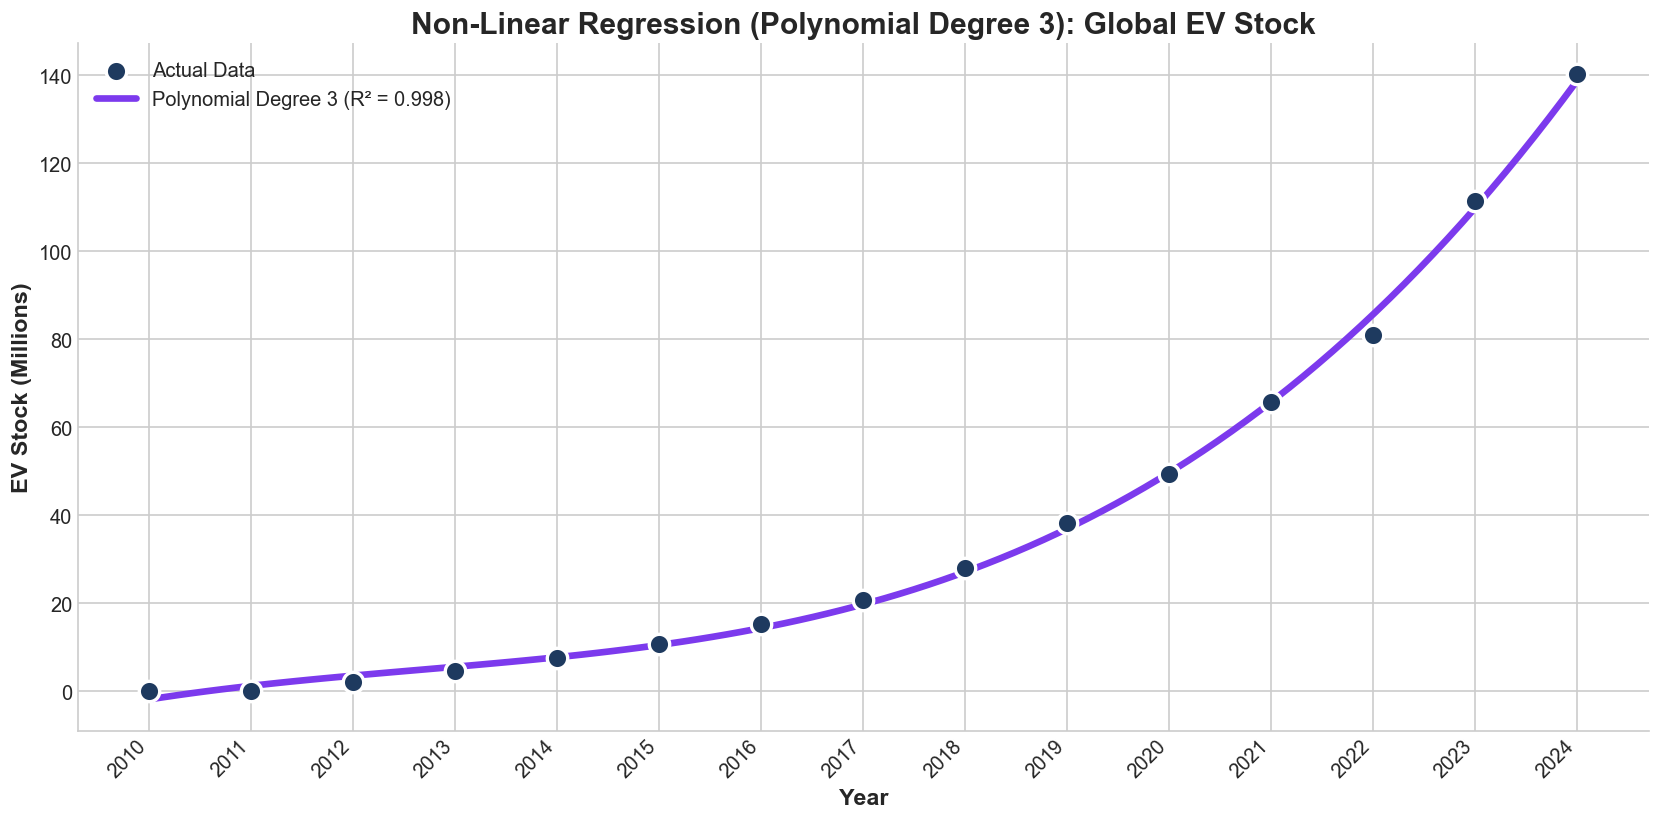

In [86]:
# Visualization: Polynomial Regression (Degree 3)
plt.figure(figsize=(14, 7))

plt.scatter(ev_stock_global['Year'], ev_stock_global['EV_Millions'], 
            s=150, color='#1e3a5f', edgecolor='white', linewidth=2, zorder=5, label='Actual Data')

X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_smooth_poly3 = poly3_model.predict(poly3.transform(X_smooth)) / 1e6
plt.plot(X_smooth, y_smooth_poly3, '-', color='#7c3aed', linewidth=4, 
         label=f'Polynomial Degree 3 (R² = {r2_poly3:.3f})')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Stock (Millions)', fontweight='bold')
plt.title('Non-Linear Regression (Polynomial Degree 3): Global EV Stock')
plt.legend(loc='upper left', fontsize=12)
plt.xticks(ev_stock_global['Year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Model Comparison

In [87]:
# Compare All Models
comparison_df = pd.DataFrame({
    'Model': ['Simple Linear', 'Multiple Linear', 'Polynomial (Deg 2)', 'Polynomial (Deg 3)', 'Polynomial (Deg 4)'],
    'R2_Score': [r2_linear, r2_multi, poly_df.iloc[0]['R2'], poly_df.iloc[1]['R2'], poly_df.iloc[2]['R2']],
    'RMSE_Millions': [rmse_linear/1e6, rmse_multi/1e6, poly_df.iloc[0]['RMSE'], poly_df.iloc[1]['RMSE'], poly_df.iloc[2]['RMSE']]
})

print("Model Comparison:")
print(comparison_df.round(4).to_string(index=False))

Model Comparison:
             Model  R2_Score  RMSE_Millions
     Simple Linear    0.2908        22.6922
   Multiple Linear    0.9771         4.0770
Polynomial (Deg 2)    0.9245         7.4021
Polynomial (Deg 3)    0.9805         3.7644
Polynomial (Deg 4)    0.9806         3.7534


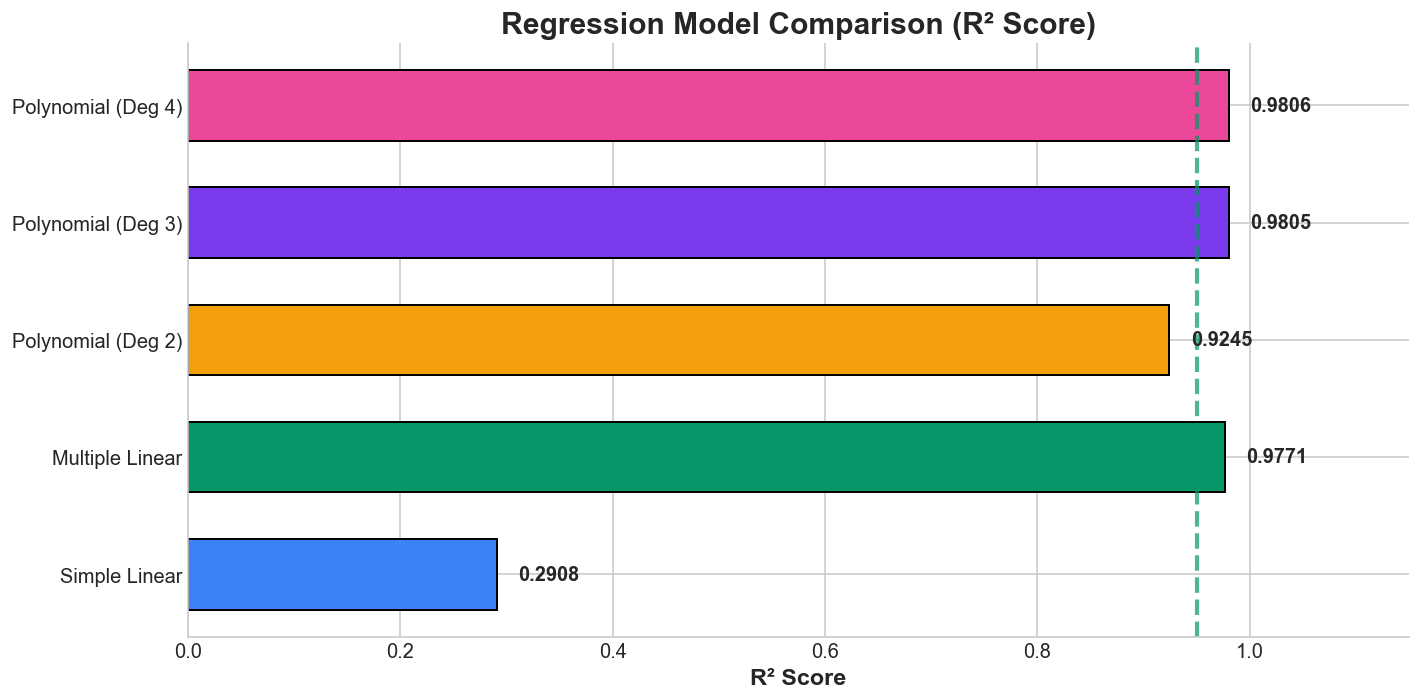

In [88]:
# Visualization: Model Comparison - R² Score
plt.figure(figsize=(12, 6))

colors = ['#3b82f6', '#059669', '#f59e0b', '#7c3aed', '#ec4899']
bars = plt.barh(comparison_df['Model'], comparison_df['R2_Score'], 
                color=colors, edgecolor='black', linewidth=1.2, height=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}', ha='left', va='center', fontsize=12, fontweight='bold')

plt.axvline(x=0.95, color='#059669', linestyle='--', linewidth=2.5, alpha=0.7)
plt.xlabel('R² Score', fontweight='bold')
plt.title('Regression Model Comparison (R² Score)')
plt.xlim(0, 1.15)
plt.tight_layout()
plt.show()

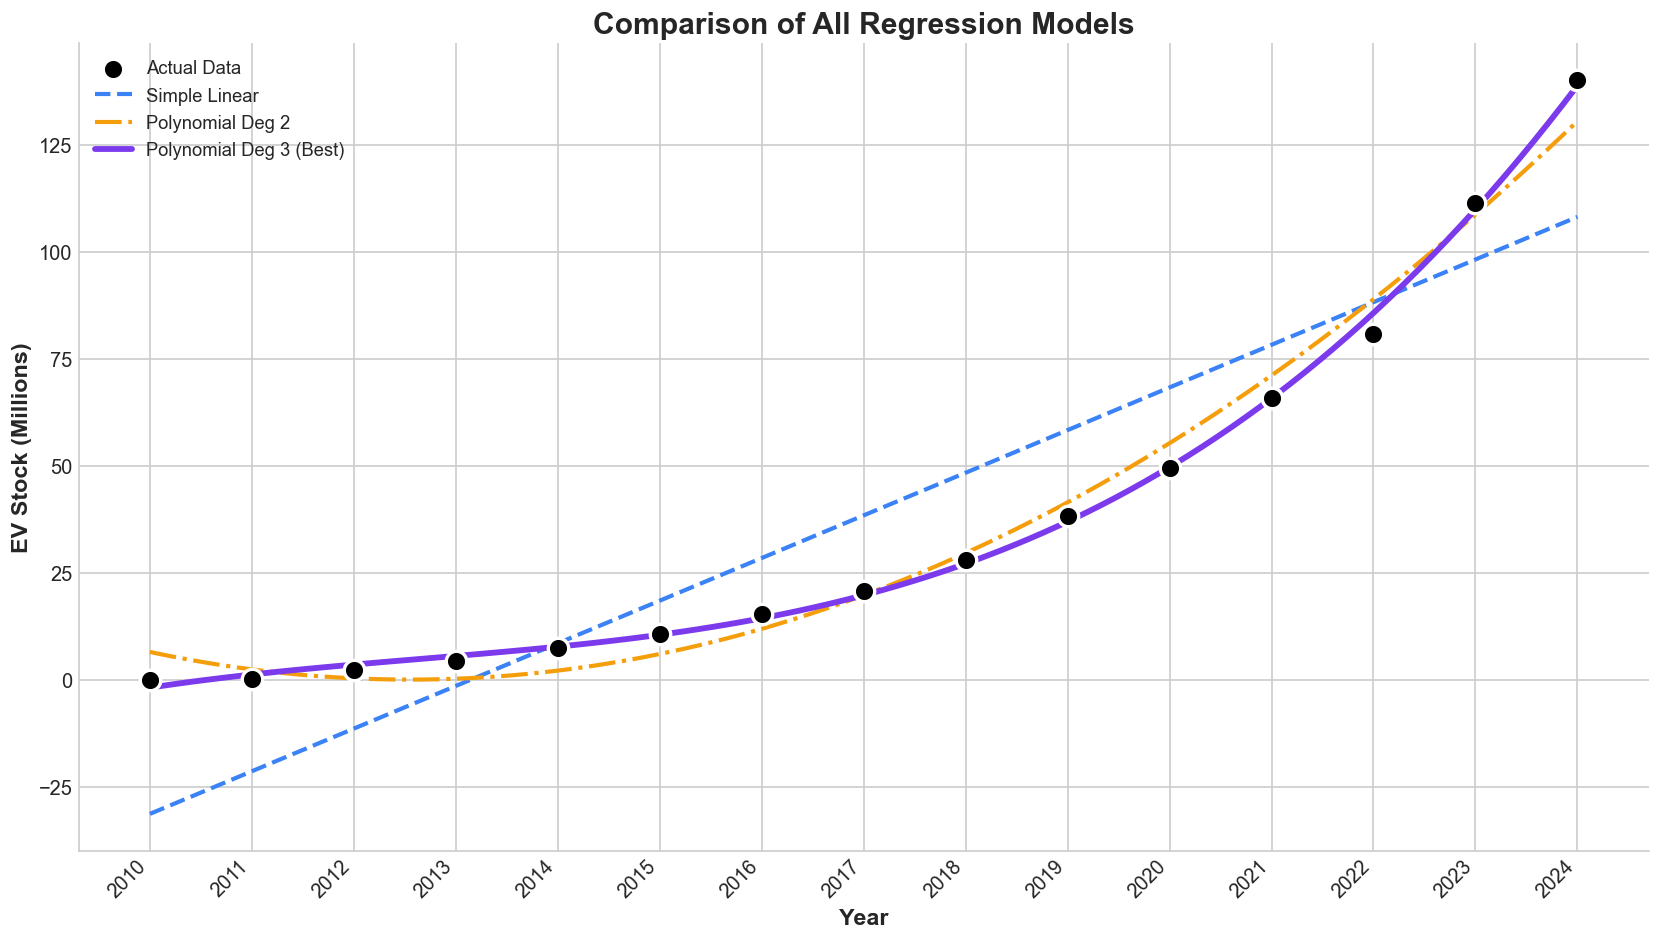

In [89]:
# Visualization: All Models on Same Plot
plt.figure(figsize=(14, 8))

plt.scatter(ev_stock_global['Year'], ev_stock_global['EV_Millions'], 
            s=150, color='black', edgecolor='white', linewidth=2, zorder=5, label='Actual Data')

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Linear
y_plot_linear = linear_model.predict(X_plot) / 1e6
plt.plot(X_plot, y_plot_linear, '--', color='#3b82f6', linewidth=2.5, label='Simple Linear')

# Polynomial Degree 2
poly2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_model_full = LinearRegression()
poly2_model_full.fit(poly2.fit_transform(X), y)
y_plot_poly2 = poly2_model_full.predict(poly2.transform(X_plot)) / 1e6
plt.plot(X_plot, y_plot_poly2, '-.', color='#f59e0b', linewidth=2.5, label='Polynomial Deg 2')

# Polynomial Degree 3
y_plot_poly3 = poly3_model.predict(poly3.transform(X_plot)) / 1e6
plt.plot(X_plot, y_plot_poly3, '-', color='#7c3aed', linewidth=3.5, label='Polynomial Deg 3 (Best)')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Stock (Millions)', fontweight='bold')
plt.title('Comparison of All Regression Models')
plt.legend(loc='upper left', fontsize=11)
plt.xticks(ev_stock_global['Year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Future Prediction (2025-2030)

In [90]:
# Generate Future Predictions
future_years = np.arange(2025, 2031).reshape(-1, 1)
future_predictions = poly3_model.predict(poly3.transform(future_years))

forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_EV_Stock': future_predictions,
    'Predicted_Millions': future_predictions / 1e6
})

print("EV Stock Forecast (2025-2030):")
print(forecast_df.round(2).to_string(index=False))

EV Stock Forecast (2025-2030):
 Year  Predicted_EV_Stock  Predicted_Millions
 2025        173029330.62              173.03
 2026        212823441.88              212.82
 2027        258732585.38              258.73
 2028        311215168.88              311.22
 2029        370729601.12              370.73
 2030        437734290.00              437.73


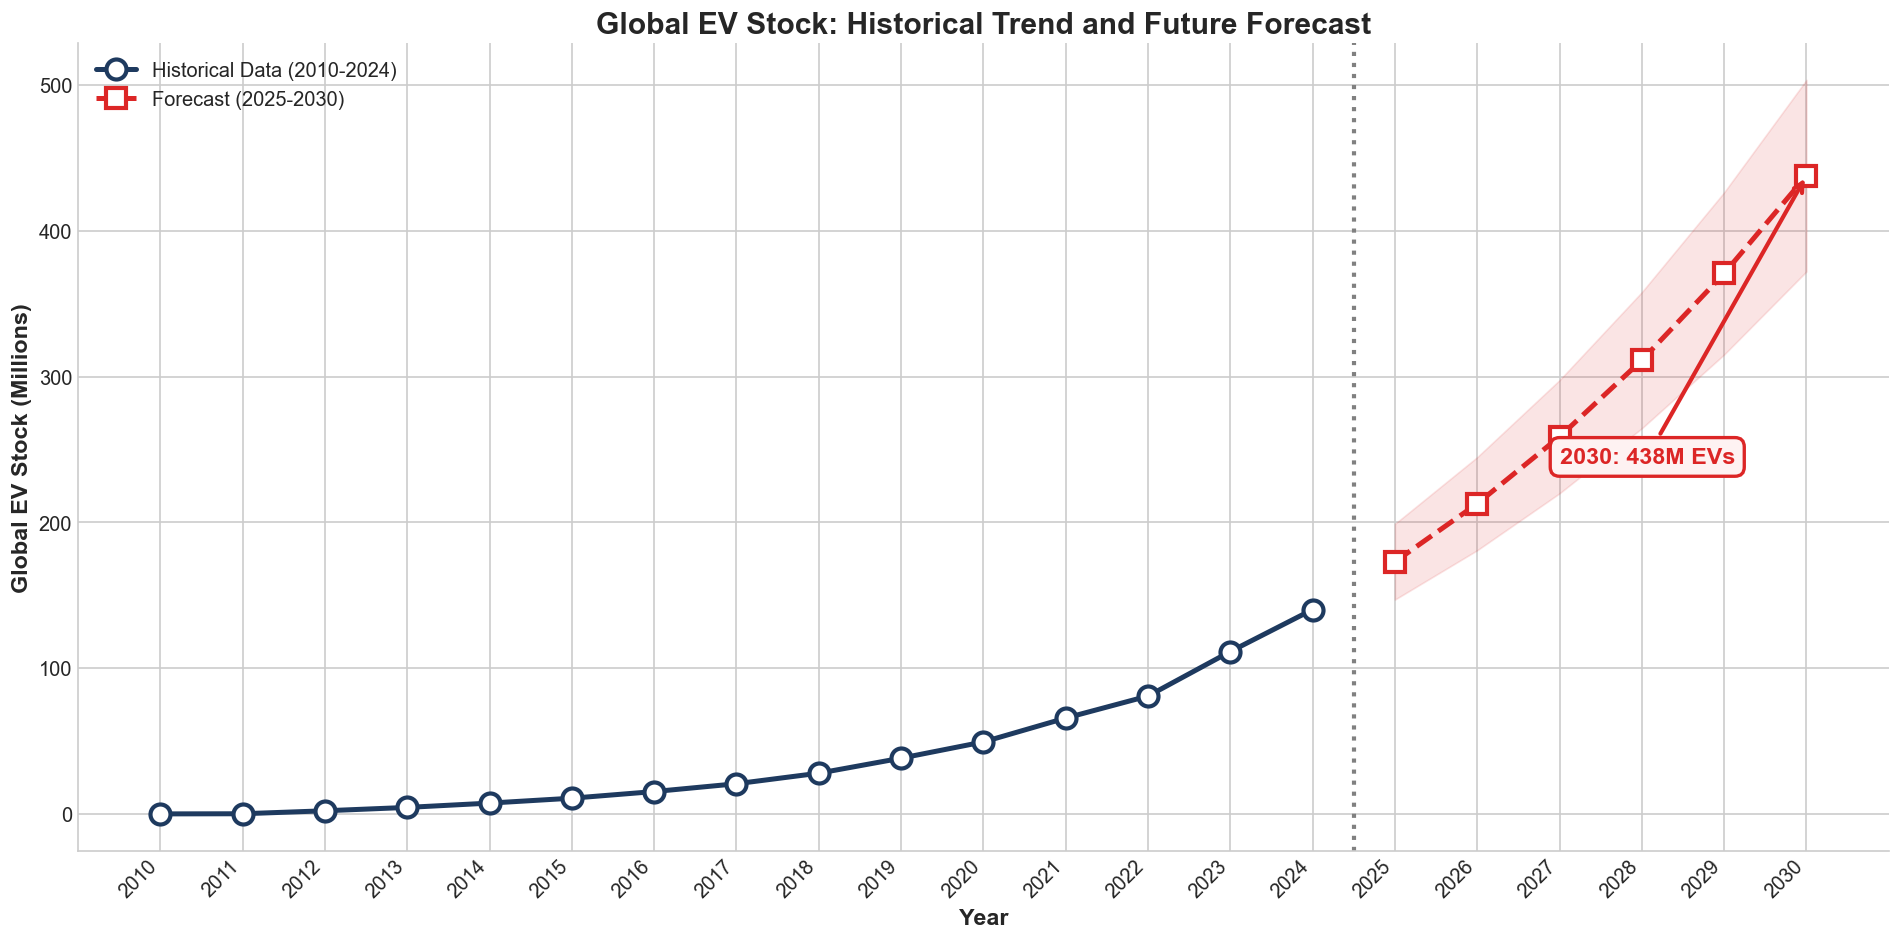

In [91]:
# Visualization: Historical + Future Forecast
plt.figure(figsize=(16, 8))

# Historical
plt.plot(ev_stock_global['Year'], ev_stock_global['EV_Millions'], 
         'o-', color='#1e3a5f', linewidth=3, markersize=12,
         markerfacecolor='white', markeredgewidth=2.5,
         label='Historical Data (2010-2024)')

# Forecast
plt.plot(forecast_df['Year'], forecast_df['Predicted_Millions'], 
         's--', color='#dc2626', linewidth=3, markersize=12,
         markerfacecolor='white', markeredgewidth=2.5,
         label='Forecast (2025-2030)')

# Uncertainty band
plt.fill_between(forecast_df['Year'], 
                 forecast_df['Predicted_Millions'] * 0.85,
                 forecast_df['Predicted_Millions'] * 1.15,
                 color='#dc2626', alpha=0.12)

# Divider line
plt.axvline(x=2024.5, color='gray', linestyle=':', linewidth=2.5)

# Annotation for 2030
pred_2030 = forecast_df[forecast_df['Year']==2030]['Predicted_Millions'].values[0]
plt.annotate(f'2030: {pred_2030:.0f}M EVs', 
             xy=(2030, pred_2030),
             xytext=(2027, pred_2030 * 0.55),
             fontsize=14, fontweight='bold', color='#dc2626',
             arrowprops=dict(arrowstyle='->', color='#dc2626', lw=2.5),
             bbox=dict(boxstyle='round,pad=0.4', facecolor='#fef2f2', edgecolor='#dc2626', linewidth=2))

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Global EV Stock (Millions)', fontweight='bold')
plt.title('Global EV Stock: Historical Trend and Future Forecast')
plt.legend(loc='upper left', fontsize=12)

all_years = list(ev_stock_global['Year']) + list(forecast_df['Year'])
plt.xticks(all_years, rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Residual Analysis

In [92]:
# Calculate Residuals
residuals = y - y_pred_poly3
residuals_millions = residuals / 1e6

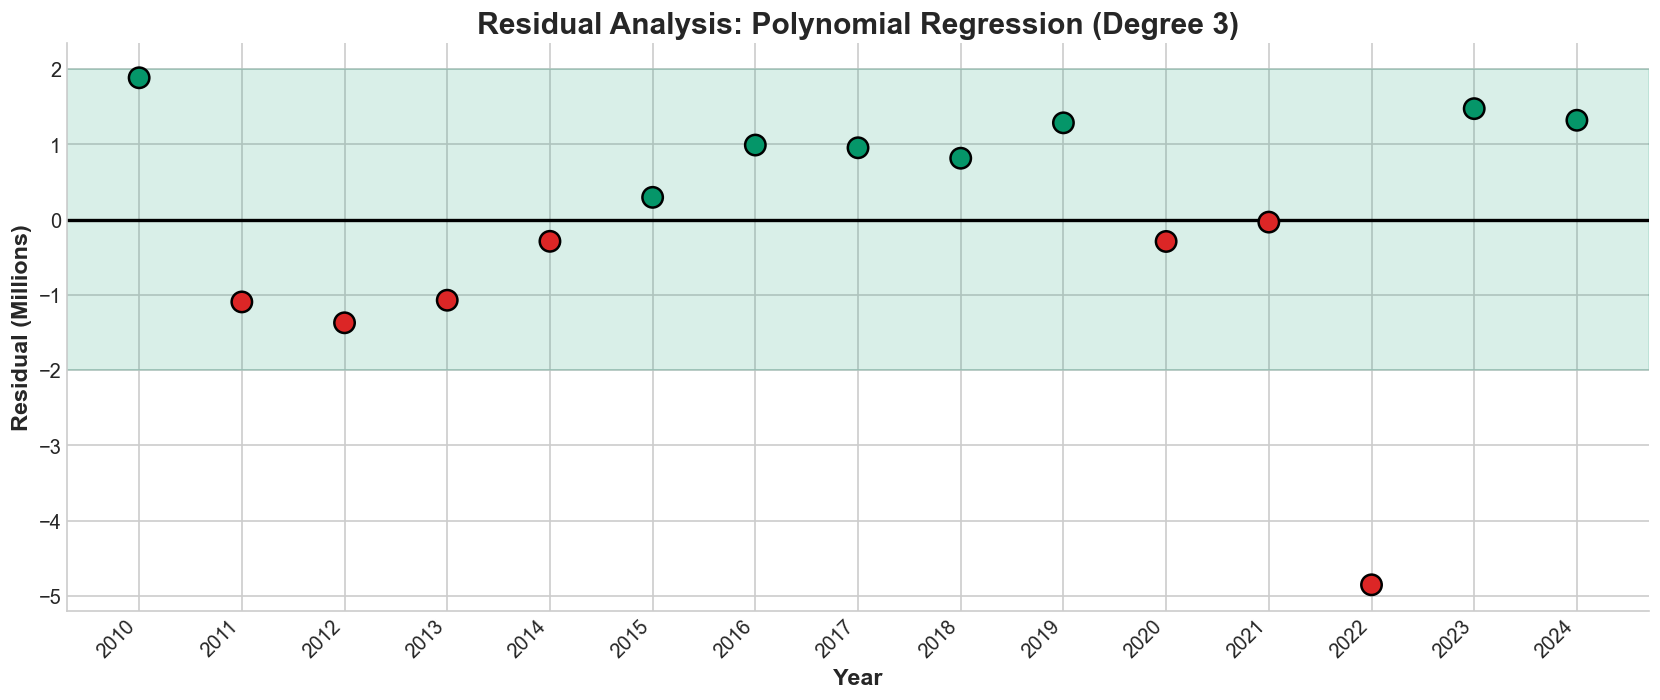

In [93]:
# Visualization: Residual Plot
plt.figure(figsize=(14, 6))

colors = ['#059669' if r >= 0 else '#dc2626' for r in residuals_millions]
plt.scatter(ev_stock_global['Year'], residuals_millions, 
            s=150, c=colors, edgecolor='black', linewidth=1.5, zorder=3)

plt.axhline(y=0, color='black', linewidth=2)
plt.axhspan(-2, 2, alpha=0.15, color='#059669')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Residual (Millions)', fontweight='bold')
plt.title('Residual Analysis: Polynomial Regression (Degree 3)')
plt.xticks(ev_stock_global['Year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
# Additional Analysis for Complete Evaluation

## Train/Test Split Visualization

In [94]:
# Visualize Train/Test Split
train_mask = ev_stock_global['Year'] <= 2020
test_mask = ev_stock_global['Year'] > 2020

train_data = ev_stock_global[train_mask]
test_data = ev_stock_global[test_mask]

print(f"Training Data: {len(train_data)} years (2010-2020)")
print(f"Testing Data: {len(test_data)} years (2021-2024)")
print(f"Split Ratio: {len(train_data)/(len(train_data)+len(test_data))*100:.0f}% Train / {len(test_data)/(len(train_data)+len(test_data))*100:.0f}% Test")

Training Data: 11 years (2010-2020)
Testing Data: 4 years (2021-2024)
Split Ratio: 73% Train / 27% Test


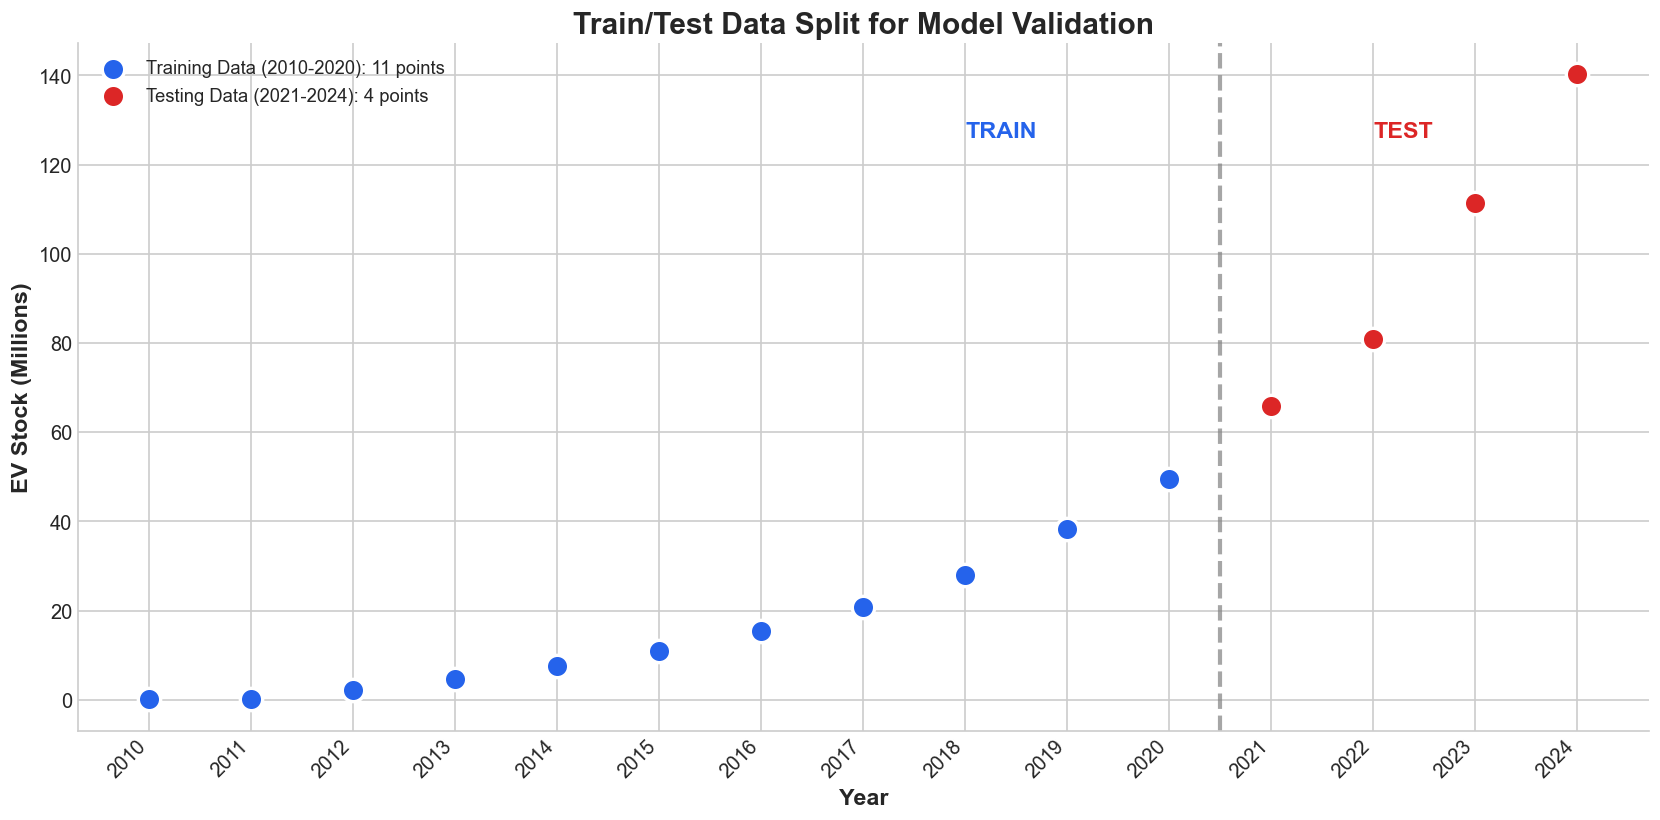

In [95]:
# Visualization: Train/Test Split
plt.figure(figsize=(14, 7))

plt.scatter(train_data['Year'], train_data['EV_Millions'], 
            s=180, color='#2563eb', edgecolor='white', linewidth=2, 
            label=f'Training Data (2010-2020): {len(train_data)} points', zorder=3)
plt.scatter(test_data['Year'], test_data['EV_Millions'], 
            s=180, color='#dc2626', edgecolor='white', linewidth=2, 
            label=f'Testing Data (2021-2024): {len(test_data)} points', zorder=3)

plt.axvline(x=2020.5, color='gray', linestyle='--', linewidth=2.5, alpha=0.7)
plt.text(2018, ev_stock_global['EV_Millions'].max()*0.9, 'TRAIN', fontsize=14, fontweight='bold', color='#2563eb')
plt.text(2022, ev_stock_global['EV_Millions'].max()*0.9, 'TEST', fontsize=14, fontweight='bold', color='#dc2626')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Stock (Millions)', fontweight='bold')
plt.title('Train/Test Data Split for Model Validation')
plt.legend(loc='upper left', fontsize=11)
plt.xticks(ev_stock_global['Year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Actual vs Predicted on Test Set

In [96]:
# Prepare data with proper train/test split
X_all = ev_stock_global[['Year']].values
y_all = ev_stock_global['EV_Stock'].values

X_train_proper = ev_stock_global[train_mask][['Year']].values
y_train_proper = ev_stock_global[train_mask]['EV_Stock'].values
X_test_proper = ev_stock_global[test_mask][['Year']].values
y_test_proper = ev_stock_global[test_mask]['EV_Stock'].values

# Fit models on training data only
# Linear
linear_proper = LinearRegression()
linear_proper.fit(X_train_proper, y_train_proper)
y_pred_linear_test = linear_proper.predict(X_test_proper)

# Polynomial Degree 3
poly3_proper = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3_proper.fit_transform(X_train_proper)
X_test_poly3 = poly3_proper.transform(X_test_proper)

poly3_model_proper = LinearRegression()
poly3_model_proper.fit(X_train_poly3, y_train_proper)
y_pred_poly3_test = poly3_model_proper.predict(X_test_poly3)

print("Test Set Predictions:")
test_results = pd.DataFrame({
    'Year': X_test_proper.flatten(),
    'Actual': y_test_proper / 1e6,
    'Linear_Pred': y_pred_linear_test / 1e6,
    'Poly3_Pred': y_pred_poly3_test / 1e6
})
print(test_results.round(2).to_string(index=False))

Test Set Predictions:
 Year  Actual  Linear_Pred  Poly3_Pred
 2021   65.80        44.31       63.04
 2022   80.90        49.01       79.24
 2023  111.43        53.71       98.19
 2024  140.21        58.41      120.13


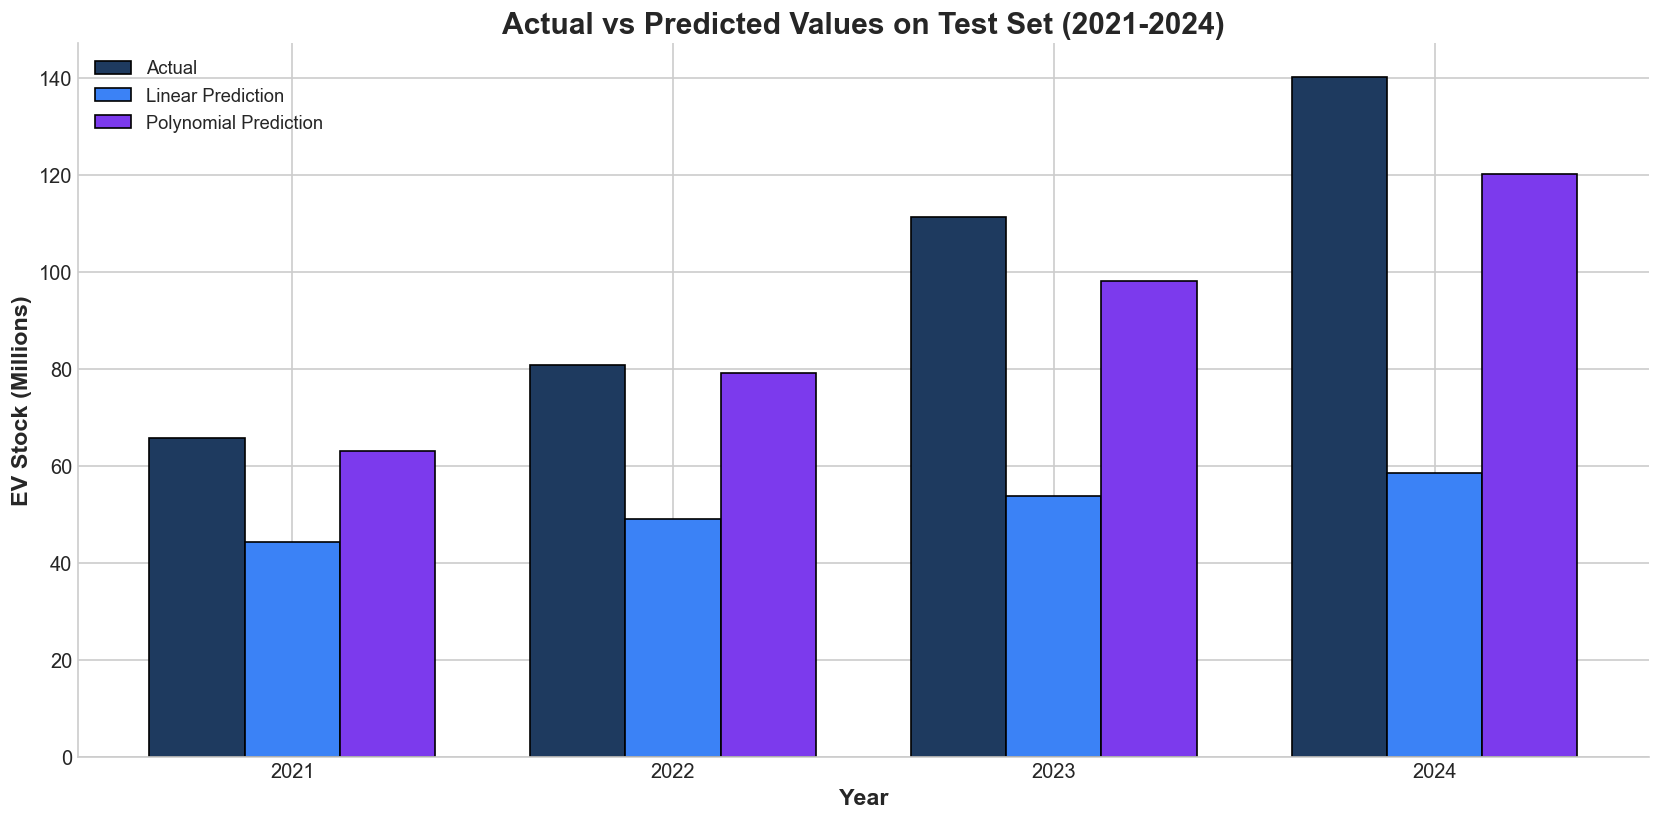


Test Set R² Scores:
  Linear: -2.5048
  Polynomial (Deg 3): 0.8205


In [97]:
# Visualization: Actual vs Predicted on Test Set
plt.figure(figsize=(14, 7))

years_test = X_test_proper.flatten()
width = 0.25
x = np.arange(len(years_test))

bars1 = plt.bar(x - width, y_test_proper/1e6, width, label='Actual', color='#1e3a5f', edgecolor='black')
bars2 = plt.bar(x, y_pred_linear_test/1e6, width, label='Linear Prediction', color='#3b82f6', edgecolor='black')
bars3 = plt.bar(x + width, y_pred_poly3_test/1e6, width, label='Polynomial Prediction', color='#7c3aed', edgecolor='black')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Stock (Millions)', fontweight='bold')
plt.title('Actual vs Predicted Values on Test Set (2021-2024)')
plt.xticks(x, years_test.astype(int))
plt.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

# Calculate test metrics
r2_linear_test = r2_score(y_test_proper, y_pred_linear_test)
r2_poly3_test = r2_score(y_test_proper, y_pred_poly3_test)
print(f"\nTest Set R² Scores:")
print(f"  Linear: {r2_linear_test:.4f}")
print(f"  Polynomial (Deg 3): {r2_poly3_test:.4f}")

## Regression Model Equations

In [98]:
# Display Regression Equations

print("="*70)
print("REGRESSION MODEL EQUATIONS")
print("="*70)

# Simple Linear
print(f"\n1. SIMPLE LINEAR REGRESSION:")
print(f"   EV_Stock = {linear_proper.coef_[0]:,.2f} × Year + {linear_proper.intercept_:,.2f}")
print(f"   Interpretation: For each year, EV stock increases by {linear_proper.coef_[0]/1e6:.2f} million")

# Multiple Linear
print(f"\n2. MULTIPLE LINEAR REGRESSION:")
print(f"   EV_Stock = {multi_model.coef_[0]:,.2f} × Year + {multi_model.coef_[1]:.4f} × Charging_Points + {multi_model.intercept_:,.2f}")
print(f"   Interpretation: Each additional charging point correlates with {multi_model.coef_[1]:.2f} more EVs")

# Polynomial Degree 3
poly3_full = PolynomialFeatures(degree=3, include_bias=False)
X_poly3_full = poly3_full.fit_transform(X_all)
poly3_model_full = LinearRegression()
poly3_model_full.fit(X_poly3_full, y_all)

print(f"\n3. POLYNOMIAL REGRESSION (Degree 3):")
print(f"   EV_Stock = {poly3_model_full.coef_[0]:,.2f} × Year + {poly3_model_full.coef_[1]:,.2f} × Year² + {poly3_model_full.coef_[2]:,.2f} × Year³ + {poly3_model_full.intercept_:,.2f}")
print(f"   Interpretation: The cubic term captures the accelerating (exponential) growth pattern")

print("\n" + "="*70)

REGRESSION MODEL EQUATIONS

1. SIMPLE LINEAR REGRESSION:
   EV_Stock = 4,699,277.95 × Year + -9,452,926,503.73
   Interpretation: For each year, EV stock increases by 4.70 million

2. MULTIPLE LINEAR REGRESSION:
   EV_Stock = 2,578,563.05 × Year + 20.1754 × Charging_Points + -5,186,877,913.98
   Interpretation: Each additional charging point correlates with 20.18 more EVs

3. POLYNOMIAL REGRESSION (Degree 3):
   EV_Stock = 928,462,155,482.43 × Year + -461,309,924.91 × Year² + 76,401.36 × Year³ + -622,895,633,606,264.12
   Interpretation: The cubic term captures the accelerating (exponential) growth pattern



---
## EV Sales Prediction (Replicating Analysis)

In [99]:
# Prepare EV Sales Data for Regression
X_sales = ev_sales_global[['Year']].values
y_sales = ev_sales_global['EV_Sales'].values

# Train/Test Split for Sales
sales_train_mask = ev_sales_global['Year'] <= 2020
sales_test_mask = ev_sales_global['Year'] > 2020

X_train_sales = ev_sales_global[sales_train_mask][['Year']].values
y_train_sales = ev_sales_global[sales_train_mask]['EV_Sales'].values
X_test_sales = ev_sales_global[sales_test_mask][['Year']].values
y_test_sales = ev_sales_global[sales_test_mask]['EV_Sales'].values

print(f"EV Sales Data:")
print(f"  Training: {len(X_train_sales)} years (2010-2020)")
print(f"  Testing: {len(X_test_sales)} years (2021-2024)")

EV Sales Data:
  Training: 11 years (2010-2020)
  Testing: 4 years (2021-2024)


In [100]:
# Fit Regression Models for EV Sales

# Simple Linear
linear_sales = LinearRegression()
linear_sales.fit(X_train_sales, y_train_sales)
y_pred_linear_sales = linear_sales.predict(X_test_sales)

# Polynomial Degree 3
poly3_sales = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3_sales = poly3_sales.fit_transform(X_train_sales)
X_test_poly3_sales = poly3_sales.transform(X_test_sales)

poly3_model_sales = LinearRegression()
poly3_model_sales.fit(X_train_poly3_sales, y_train_sales)
y_pred_poly3_sales = poly3_model_sales.predict(X_test_poly3_sales)

# Calculate metrics
r2_linear_sales = r2_score(y_test_sales, y_pred_linear_sales)
r2_poly3_sales = r2_score(y_test_sales, y_pred_poly3_sales)

print("EV Sales Regression Results (Test Set):")
print(f"  Linear R²: {r2_linear_sales:.4f}")
print(f"  Polynomial (Deg 3) R²: {r2_poly3_sales:.4f}")

EV Sales Regression Results (Test Set):
  Linear R²: -6.2681
  Polynomial (Deg 3) R²: 0.4475


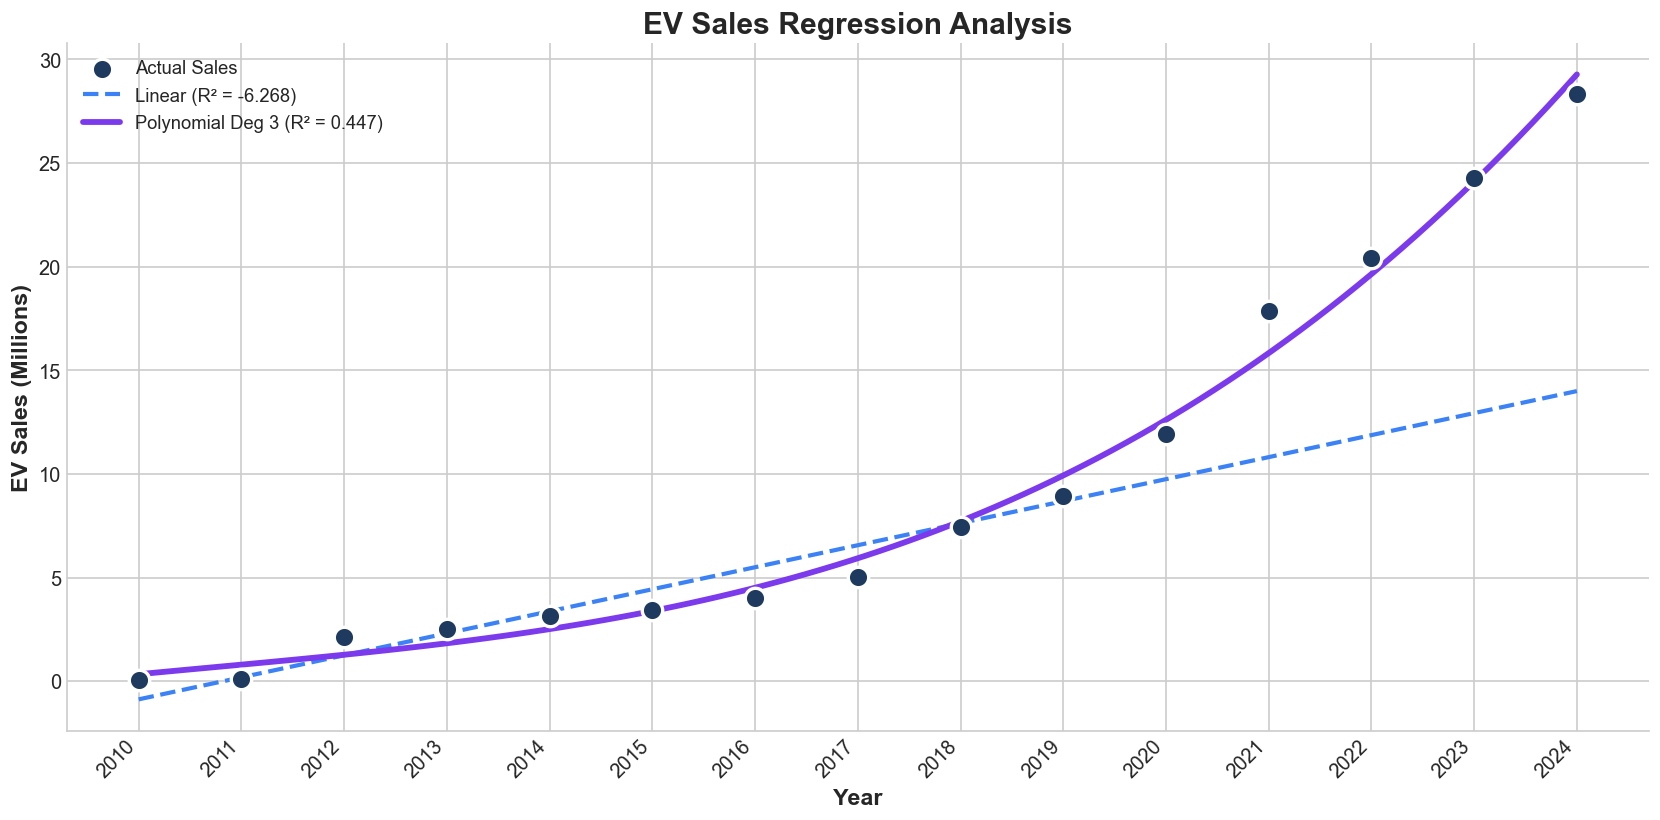

In [101]:
# Visualization: EV Sales - All Models Comparison
plt.figure(figsize=(14, 7))

plt.scatter(ev_sales_global['Year'], ev_sales_global['EV_Millions'], 
            s=150, color='#1e3a5f', edgecolor='white', linewidth=2, zorder=5, label='Actual Sales')

X_plot_sales = np.linspace(X_sales.min(), X_sales.max(), 100).reshape(-1, 1)

# Linear prediction line
y_plot_linear_sales = linear_sales.predict(X_plot_sales) / 1e6
plt.plot(X_plot_sales, y_plot_linear_sales, '--', color='#3b82f6', linewidth=2.5, 
         label=f'Linear (R² = {r2_linear_sales:.3f})')

# Polynomial prediction line
poly3_sales_full = PolynomialFeatures(degree=3, include_bias=False)
poly3_sales_full.fit(X_sales)
poly3_model_sales_full = LinearRegression()
poly3_model_sales_full.fit(poly3_sales_full.transform(X_sales), y_sales)
y_plot_poly3_sales = poly3_model_sales_full.predict(poly3_sales_full.transform(X_plot_sales)) / 1e6
plt.plot(X_plot_sales, y_plot_poly3_sales, '-', color='#7c3aed', linewidth=3.5, 
         label=f'Polynomial Deg 3 (R² = {r2_poly3_sales:.3f})')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Sales (Millions)', fontweight='bold')
plt.title('EV Sales Regression Analysis')
plt.legend(loc='upper left', fontsize=11)
plt.xticks(ev_sales_global['Year'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [102]:
# EV Sales Forecast (2025-2030)
future_years_sales = np.arange(2025, 2031).reshape(-1, 1)
future_pred_sales = poly3_model_sales_full.predict(poly3_sales_full.transform(future_years_sales))

forecast_sales_df = pd.DataFrame({
    'Year': future_years_sales.flatten(),
    'Predicted_Sales_Millions': future_pred_sales / 1e6
})

print("EV Sales Forecast (2025-2030):")
print(forecast_sales_df.round(2).to_string(index=False))

EV Sales Forecast (2025-2030):
 Year  Predicted_Sales_Millions
 2025                     35.21
 2026                     41.97
 2027                     49.61
 2028                     58.19
 2029                     67.77
 2030                     78.39


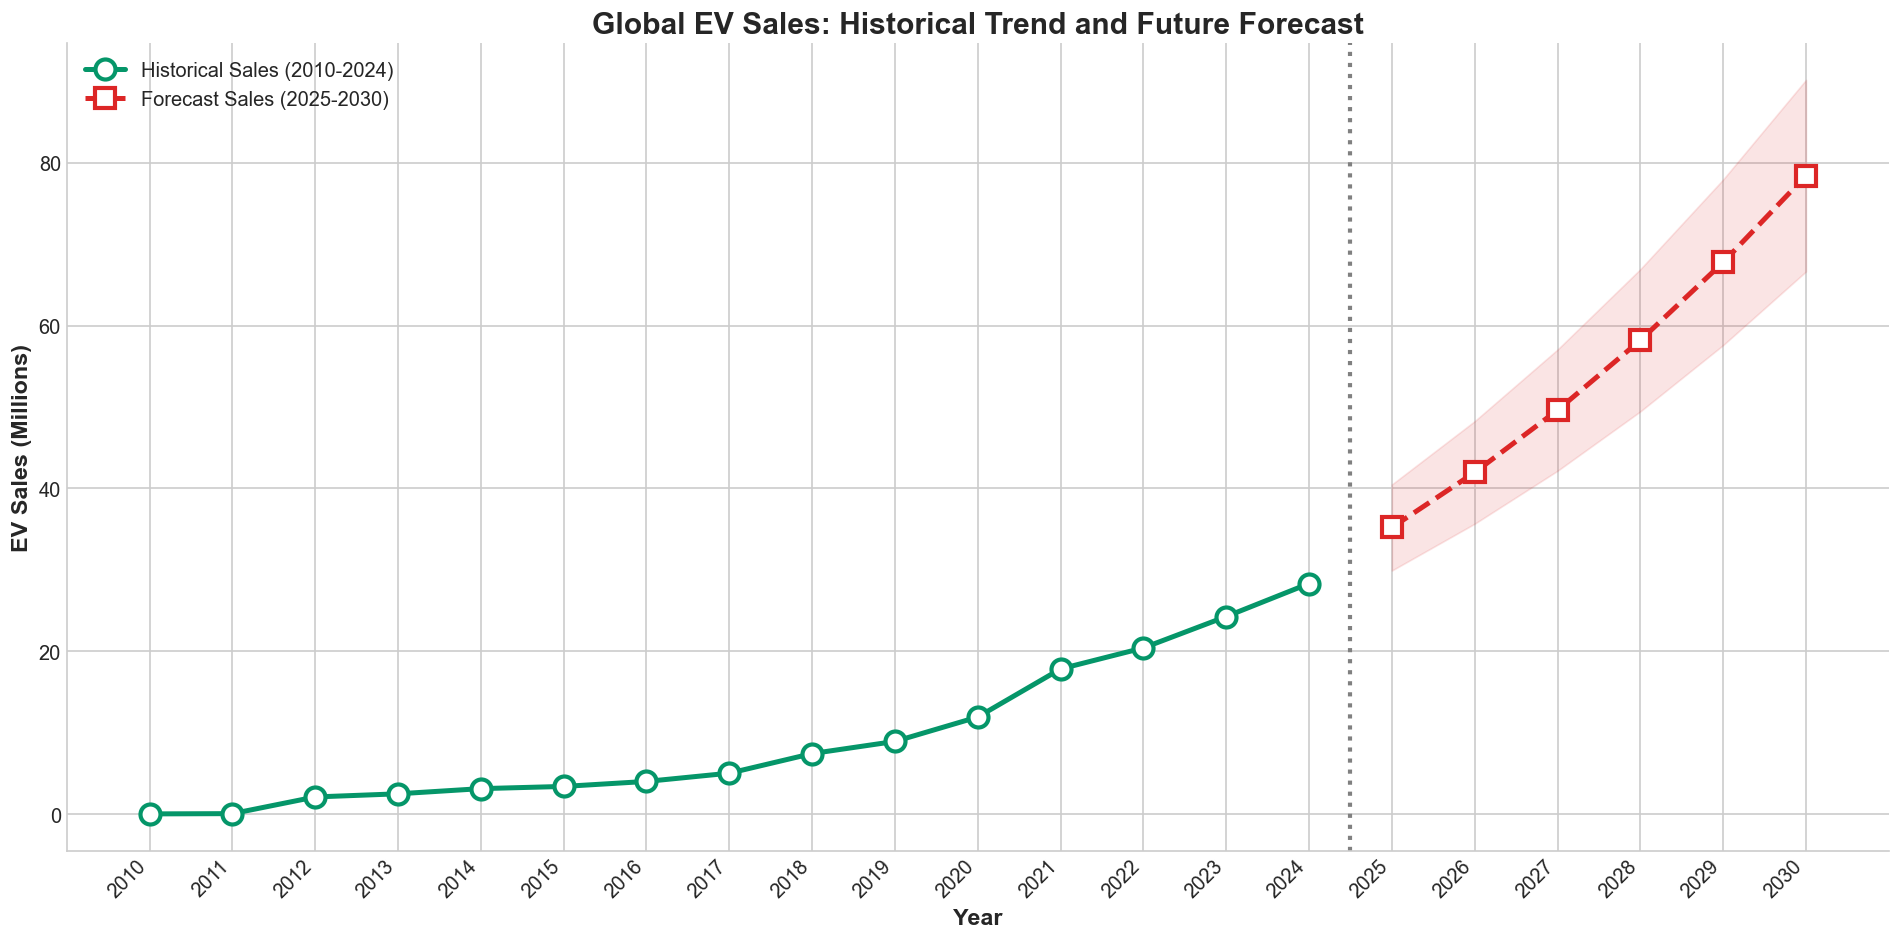

In [103]:
# Visualization: EV Sales Historical + Forecast
plt.figure(figsize=(16, 8))

plt.plot(ev_sales_global['Year'], ev_sales_global['EV_Millions'], 
         'o-', color='#059669', linewidth=3, markersize=12,
         markerfacecolor='white', markeredgewidth=2.5,
         label='Historical Sales (2010-2024)')

plt.plot(forecast_sales_df['Year'], forecast_sales_df['Predicted_Sales_Millions'], 
         's--', color='#dc2626', linewidth=3, markersize=12,
         markerfacecolor='white', markeredgewidth=2.5,
         label='Forecast Sales (2025-2030)')

plt.fill_between(forecast_sales_df['Year'], 
                 forecast_sales_df['Predicted_Sales_Millions'] * 0.85,
                 forecast_sales_df['Predicted_Sales_Millions'] * 1.15,
                 color='#dc2626', alpha=0.12)

plt.axvline(x=2024.5, color='gray', linestyle=':', linewidth=2.5)

plt.xlabel('Year', fontweight='bold')
plt.ylabel('EV Sales (Millions)', fontweight='bold')
plt.title('Global EV Sales: Historical Trend and Future Forecast')
plt.legend(loc='upper left', fontsize=12)

all_years_sales = list(ev_sales_global['Year']) + list(forecast_sales_df['Year'])
plt.xticks(all_years_sales, rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## Complete Model Summary

In [104]:
# Complete Summary Table - All Models, All Metrics

# Recalculate all metrics properly
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# EV Stock Models
# Linear
linear_full = LinearRegression()
linear_full.fit(X_all, y_all)
y_pred_linear_full = linear_full.predict(X_all)

# Poly 2
poly2_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly2_full = poly2_feat.fit_transform(X_all)
poly2_full = LinearRegression()
poly2_full.fit(X_poly2_full, y_all)
y_pred_poly2_full = poly2_full.predict(X_poly2_full)

# Poly 3
poly3_feat = PolynomialFeatures(degree=3, include_bias=False)
X_poly3_full = poly3_feat.fit_transform(X_all)
poly3_full = LinearRegression()
poly3_full.fit(X_poly3_full, y_all)
y_pred_poly3_full = poly3_full.predict(X_poly3_full)

# Multiple Linear (need to recalculate)
multi_data_full = ev_stock_global[['Year', 'EV_Stock']].merge(charging[['Year', 'Charging_Points']], on='Year', how='inner')
X_multi_full = multi_data_full[['Year', 'Charging_Points']].values
y_multi_full = multi_data_full['EV_Stock'].values
multi_full = LinearRegression()
multi_full.fit(X_multi_full, y_multi_full)
y_pred_multi_full = multi_full.predict(X_multi_full)

# Create summary table
summary_data = {
    'Model': ['Simple Linear', 'Multiple Linear', 'Polynomial (Deg 2)', 'Polynomial (Deg 3)'],
    'R² Score': [
        r2_score(y_all, y_pred_linear_full),
        r2_score(y_multi_full, y_pred_multi_full),
        r2_score(y_all, y_pred_poly2_full),
        r2_score(y_all, y_pred_poly3_full)
    ],
    'MAE (Millions)': [
        mean_absolute_error(y_all, y_pred_linear_full) / 1e6,
        mean_absolute_error(y_multi_full, y_pred_multi_full) / 1e6,
        mean_absolute_error(y_all, y_pred_poly2_full) / 1e6,
        mean_absolute_error(y_all, y_pred_poly3_full) / 1e6
    ],
    'RMSE (Millions)': [
        np.sqrt(mean_squared_error(y_all, y_pred_linear_full)) / 1e6,
        np.sqrt(mean_squared_error(y_multi_full, y_pred_multi_full)) / 1e6,
        np.sqrt(mean_squared_error(y_all, y_pred_poly2_full)) / 1e6,
        np.sqrt(mean_squared_error(y_all, y_pred_poly3_full)) / 1e6
    ]
}

summary_df = pd.DataFrame(summary_data)
print("="*70)
print("COMPLETE MODEL COMPARISON - EV STOCK PREDICTION")
print("="*70)
print(summary_df.round(4).to_string(index=False))
print("="*70)
print(f"\nBest Model: {summary_df.loc[summary_df['R² Score'].idxmax(), 'Model']}")
print(f"Highest R² Score: {summary_df['R² Score'].max():.4f}")
print("="*70)

COMPLETE MODEL COMPARISON - EV STOCK PREDICTION
             Model  R² Score  MAE (Millions)  RMSE (Millions)
     Simple Linear    0.8314         14.4179          17.2349
   Multiple Linear    0.9979          1.4864           1.9092
Polynomial (Deg 2)    0.9858          4.3887           4.9939
Polynomial (Deg 3)    0.9985          1.2014           1.6271

Best Model: Polynomial (Deg 3)
Highest R² Score: 0.9985


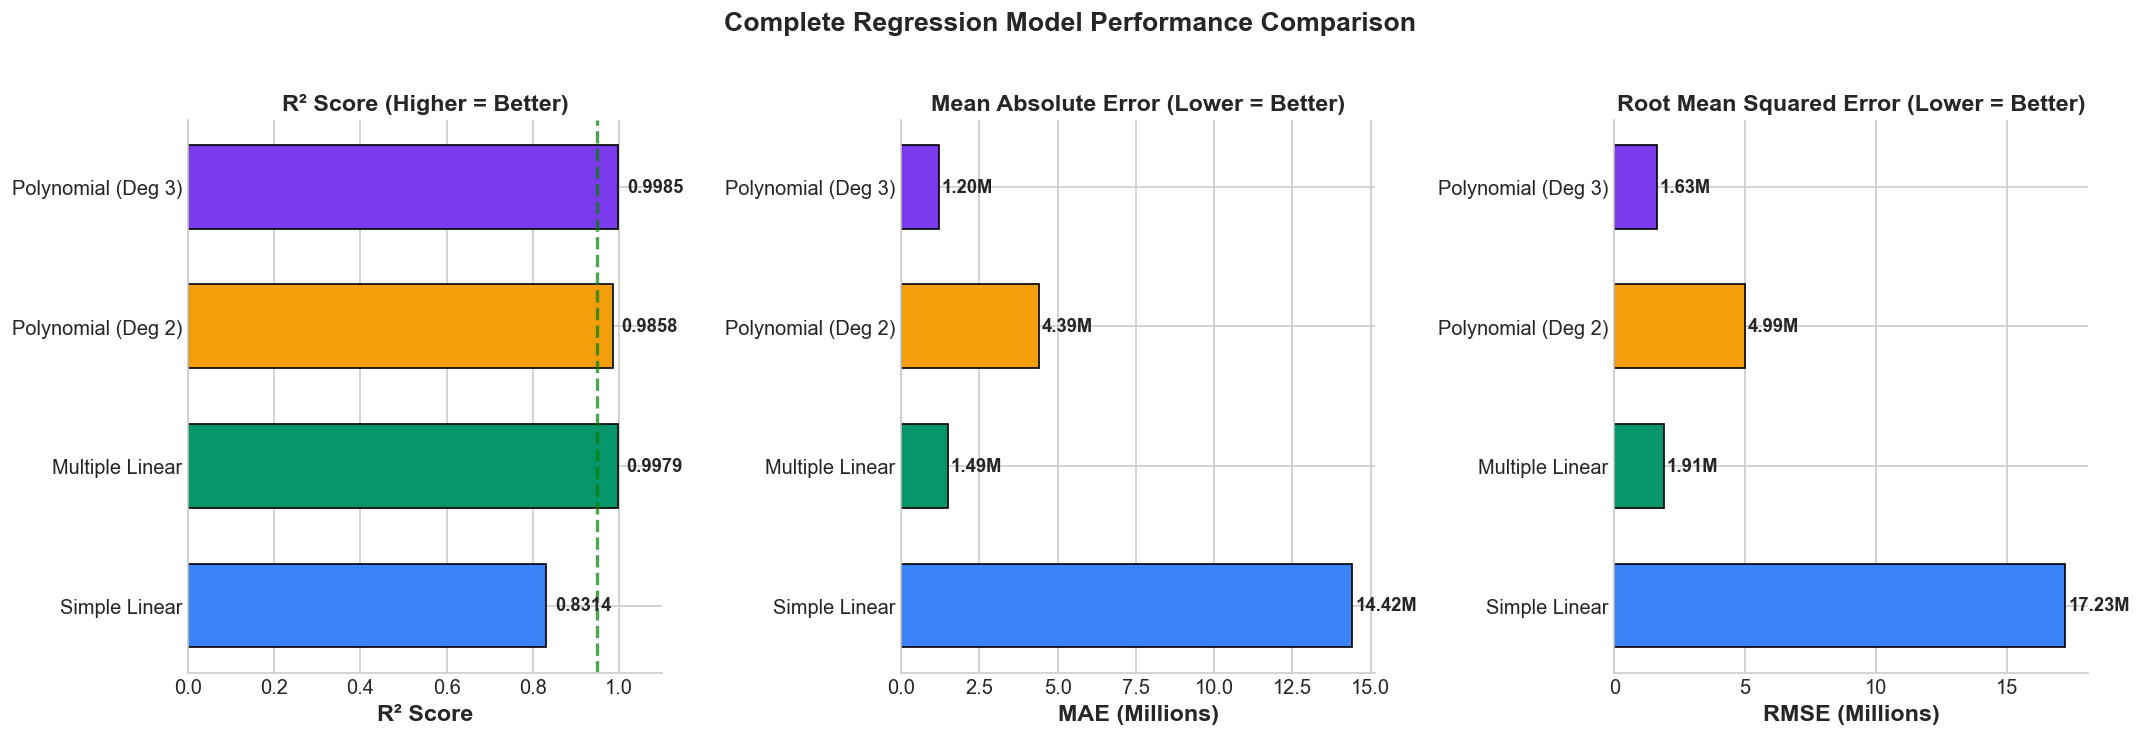

In [105]:
# Visualization: Complete Model Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['#3b82f6', '#059669', '#f59e0b', '#7c3aed']

# R² Score
ax1 = axes[0]
bars1 = ax1.barh(summary_df['Model'], summary_df['R² Score'], color=colors, edgecolor='black', height=0.6)
ax1.set_xlabel('R² Score', fontweight='bold')
ax1.set_title('R² Score (Higher = Better)', fontweight='bold', fontsize=14)
ax1.set_xlim(0, 1.1)
ax1.axvline(x=0.95, color='green', linestyle='--', linewidth=2, alpha=0.7)
for bar in bars1:
    ax1.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', fontsize=11, fontweight='bold')

# MAE
ax2 = axes[1]
bars2 = ax2.barh(summary_df['Model'], summary_df['MAE (Millions)'], color=colors, edgecolor='black', height=0.6)
ax2.set_xlabel('MAE (Millions)', fontweight='bold')
ax2.set_title('Mean Absolute Error (Lower = Better)', fontweight='bold', fontsize=14)
for bar in bars2:
    ax2.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}M', va='center', fontsize=11, fontweight='bold')

# RMSE
ax3 = axes[2]
bars3 = ax3.barh(summary_df['Model'], summary_df['RMSE (Millions)'], color=colors, edgecolor='black', height=0.6)
ax3.set_xlabel('RMSE (Millions)', fontweight='bold')
ax3.set_title('Root Mean Squared Error (Lower = Better)', fontweight='bold', fontsize=14)
for bar in bars3:
    ax3.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}M', va='center', fontsize=11, fontweight='bold')

plt.suptitle('Complete Regression Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Feature Importance (Multiple Linear Regression)

In [106]:
# Feature Importance for Multiple Linear Regression
feature_names = ['Year', 'Charging Points']
coefficients = multi_full.coef_

# Normalize coefficients for comparison
X_std = np.std(X_multi_full, axis=0)
normalized_coef = coefficients * X_std

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Normalized_Importance': np.abs(normalized_coef)
})
importance_df = importance_df.sort_values('Normalized_Importance', ascending=True)

print("Feature Importance (Multiple Linear Regression):")
print(importance_df.to_string(index=False))

Feature Importance (Multiple Linear Regression):
        Feature  Coefficient  Normalized_Importance
           Year 2.592960e+06           1.120287e+07
Charging Points 2.010124e+01           3.202978e+07


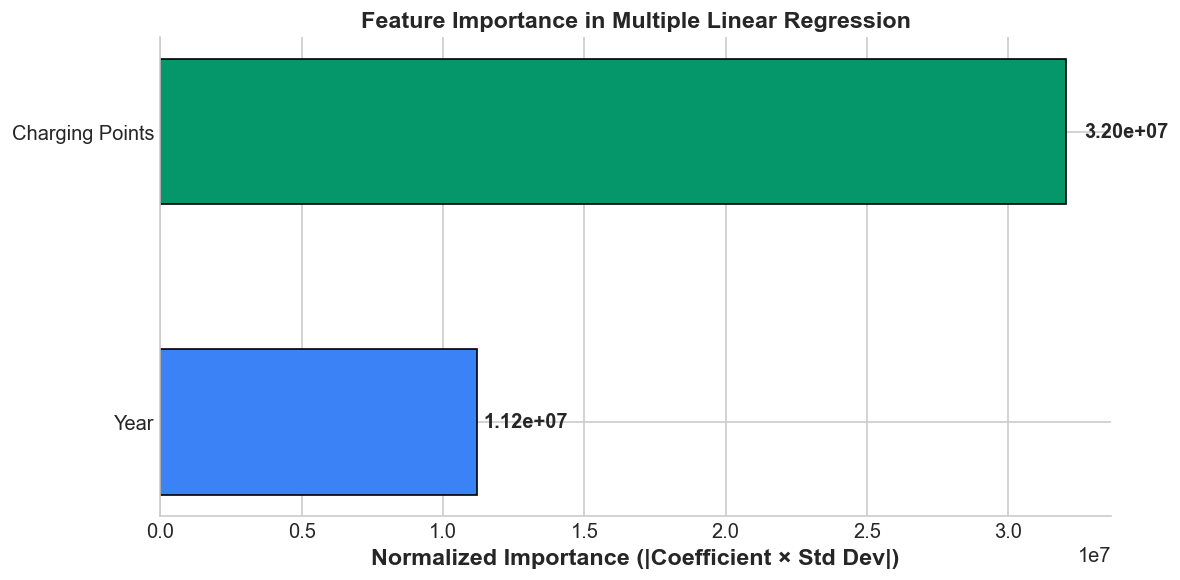

In [107]:
# Visualization: Feature Importance
plt.figure(figsize=(10, 5))

colors = ['#3b82f6', '#059669']
bars = plt.barh(importance_df['Feature'], importance_df['Normalized_Importance'], 
                color=colors, edgecolor='black', height=0.5)

for bar in bars:
    plt.text(bar.get_width() + bar.get_width()*0.02, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2e}', va='center', fontsize=12, fontweight='bold')

plt.xlabel('Normalized Importance (|Coefficient × Std Dev|)', fontweight='bold')
plt.title('Feature Importance in Multiple Linear Regression', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

---
## Combined Forecast: EV Stock and Sales (2025-2030)

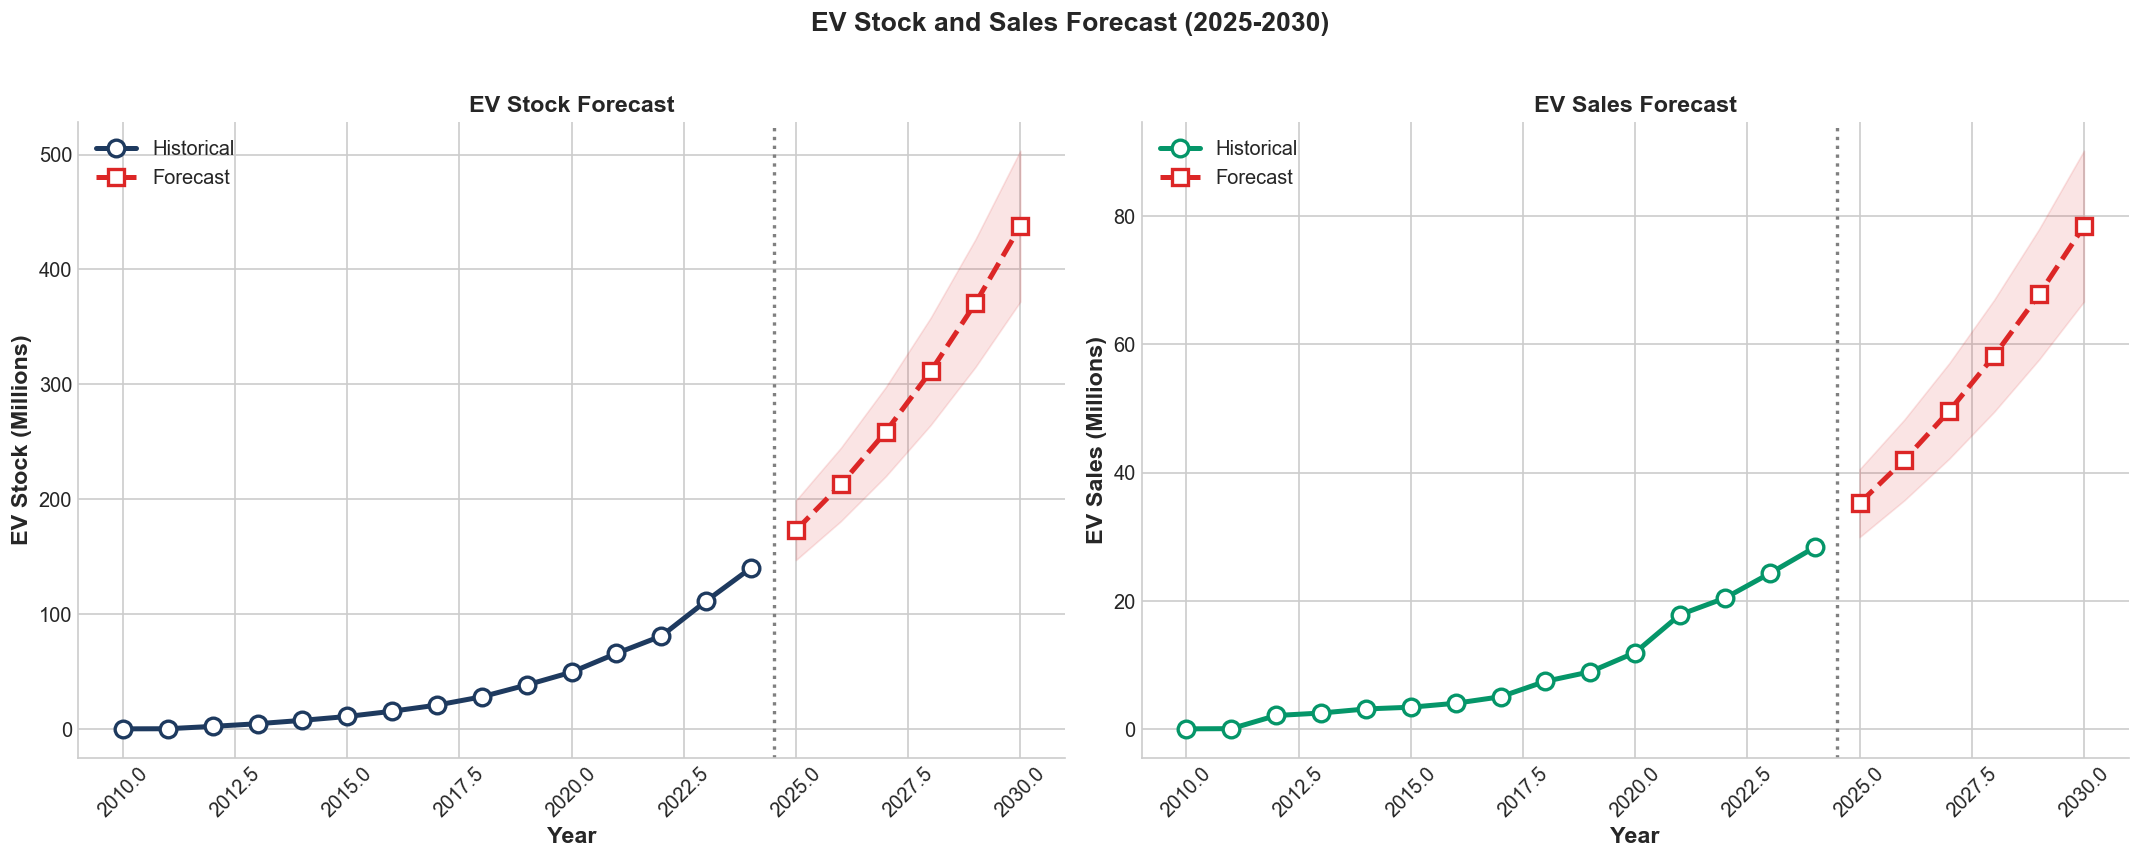

In [108]:
# Combined Forecast Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# EV Stock Forecast
ax1 = axes[0]
ax1.plot(ev_stock_global['Year'], ev_stock_global['EV_Millions'], 
         'o-', color='#1e3a5f', linewidth=3, markersize=10,
         markerfacecolor='white', markeredgewidth=2, label='Historical')

# Recalculate forecast
future_years = np.arange(2025, 2031).reshape(-1, 1)
future_stock = poly3_full.predict(poly3_feat.transform(future_years)) / 1e6

ax1.plot(future_years, future_stock, 's--', color='#dc2626', linewidth=3, markersize=10,
         markerfacecolor='white', markeredgewidth=2, label='Forecast')
ax1.fill_between(future_years.flatten(), future_stock.flatten()*0.85, future_stock.flatten()*1.15, 
                 color='#dc2626', alpha=0.12)
ax1.axvline(x=2024.5, color='gray', linestyle=':', linewidth=2)
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('EV Stock (Millions)', fontweight='bold')
ax1.set_title('EV Stock Forecast', fontweight='bold', fontsize=14)
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# EV Sales Forecast
ax2 = axes[1]
ax2.plot(ev_sales_global['Year'], ev_sales_global['EV_Millions'], 
         'o-', color='#059669', linewidth=3, markersize=10,
         markerfacecolor='white', markeredgewidth=2, label='Historical')

future_sales = poly3_model_sales_full.predict(poly3_sales_full.transform(future_years)) / 1e6

ax2.plot(future_years, future_sales, 's--', color='#dc2626', linewidth=3, markersize=10,
         markerfacecolor='white', markeredgewidth=2, label='Forecast')
ax2.fill_between(future_years.flatten(), future_sales.flatten()*0.85, future_sales.flatten()*1.15, 
                 color='#dc2626', alpha=0.12)
ax2.axvline(x=2024.5, color='gray', linestyle=':', linewidth=2)
ax2.set_xlabel('Year', fontweight='bold')
ax2.set_ylabel('EV Sales (Millions)', fontweight='bold')
ax2.set_title('EV Sales Forecast', fontweight='bold', fontsize=14)
ax2.legend(loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('EV Stock and Sales Forecast (2025-2030)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()